<div style="background-color: #D9EAD3; border-radius: 10px; border: 1px solid #D2B48C; padding: 10px;">
    <h2 style="color: #8B4513;">Import Libraries</h2>
</div>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential
from sklearn import metrics
from sklearn.metrics import cohen_kappa_score
from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.linear_model import LogisticRegression, LinearRegression 
from sklearn.metrics import classification_report, confusion_matrix,precision_score, recall_score, f1_score, accuracy_score, roc_curve, precision_recall_curve, auc
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.naive_bayes import ComplementNB, GaussianNB
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import load_iris
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis

<div style="background-color: #D9EAD3; border-radius: 10px; border: 1px solid #D2B48C; padding: 10px;">
    <h2 style="color: #8B4513;">Read Data</h2>
</div>


In [2]:
df = pd.read_csv('/Users/jxhn/Desktop/IRONHACK/Week_9/Final_project/Data/Cleaned/data1clean.csv')
df.head()

,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,SOLIDITY,EXTENT,ROUNDNESS,COMPACTNESS,SHAPEFACTOR_2,Class
0,73107,1161.8070,442.4074,217.7261,0.8705,0.9424,0.7710,0.6806,0.6896,0.0030,0
1,89272,1173.1810,460.2551,251.9546,0.8369,0.9641,0.7584,0.8151,0.7325,0.0028,1
2,60955,999.7890,386.9247,209.1255,0.8414,0.9465,0.7263,0.7663,0.7200,0.0034,0
3,79537,1439.5129,466.7973,221.2136,0.8806,0.9437,0.7568,0.4823,0.6817,0.0028,0
4,96395,1352.6740,515.8730,246.5945,0.8784,0.9549,0.7428,0.6620,0.6791,0.0026,0


In [3]:
df2 = pd.read_csv('/Users/jxhn/Desktop/IRONHACK/Week_9/Final_project/Data/Cleaned/data2clean.csv')
df2.head()

,AREA,MINOR_AXIS,ECCENTRICITY,EQDIASQ,CONVEX_AREA,ASPECT_RATIO,COMPACTNESS,SHAPEFACTOR_1,SHAPEFACTOR_3,Class
0,73107,217.7261,0.8705,305.0946,77579,2.0319,0.6896,0.0061,0.4756,0
1,89272,251.9546,0.8369,337.1419,92598,1.8267,0.7325,0.0052,0.5366,1
2,60955,209.1255,0.8414,278.5863,64400,1.8502,0.7200,0.0063,0.5184,0
3,79537,221.2136,0.8806,318.2289,84281,2.1102,0.6817,0.0059,0.4648,0
4,96395,246.5945,0.8784,350.3340,100950,2.0920,0.6791,0.0054,0.4612,0


<div style="background-color: #D9EAD3; border-radius: 10px; border: 1px solid #D2B48C; padding: 10px;">
    <h2 style="color: #8B4513;">X & y Split</h2>
</div>


### Dataset 1

In [4]:
X = df.drop(columns=['Class'],axis=1)
y = df['Class']

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
row, col = X_train.shape
print("X_train have",row,"rows and",col,"columns.")
row, col = X_test.shape
print("X_test have",row,"rows and",col,"columns.")

X_train have 3193 rows and 10 columns.
X_test have 799 rows and 10 columns.


### Dataset 2

In [7]:
X2 = df2.drop(columns=['Class'],axis=1)
y2 = df2['Class']

In [8]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.2, random_state=42)

In [9]:
row, col = X_train2.shape
print("X_train have",row,"rows and",col,"columns.")
row, col = X_test2.shape
print("X_test have",row,"rows and",col,"columns.")

X_train have 3193 rows and 9 columns.
X_test have 799 rows and 9 columns.


<div style="background-color: #D9EAD3; border-radius: 10px; border: 1px solid #D2B48C; padding: 10px;">
    <h2 style="color: #8B4513; font-size: 30px;">Machine Learning Models</h2>
</div>

In [10]:
tf.random.set_seed(12)

<div style="background-color: #D9EAD3; border-radius: 10px; border: 1px solid #D2B48C; padding: 10px;">
    <h2 style="color: #8B4513; font-size: 24px;">Decision Tree</h2>
</div>

<!DOCTYPE html>
<html>
  <head>
    <script src="https://polyfill.io/v3/polyfill.min.js?features=es6"></script>
    <script src="https://cdn.mathjax.org/mathjax/latest/MathJax.js?config=TeX-MML-AM_CHTML"></script>
  </head>
  <body>
    <p style="color: #446A46;">The Decision Tree formula:</p>
      <br/>
    <div>
      <span style="color: #446A46;">\( y = \)</span> 
      <span style="color: #446A46;">\( \begin{cases} \text{class}_1, & \text{if condition}_1 \\ \text{class}_2, & \text{if condition}_2 \\ \ldots \\ \text{class}_n, & \text{if condition}_n \end{cases} \)</span>
    </div>
  </body>
</html>

<div style="background-color: #D9EAD3; border-radius: 10px; border: 1px solid #D2B48C; padding: 10px;">
    <h2 style="color: #8B4513; font-size: 20px;">GridSearch for finding out the best hyperparameters</h2>
</div>

### Dataset 1

In [11]:
hyperparameters = [{
    'criterion': ['gini', 'entropy'],
    'max_depth': [5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'max_features': ['sqrt', 'log2'],
    'min_samples_leaf': [1, 2, 4, 10]
}]

dt = DecisionTreeClassifier()
grid_search = GridSearchCV(dt, hyperparameters, scoring='f1', cv=10, verbose=True, n_jobs=-1)
grid_search.fit(X_train, y_train)

path_of_file = '/Users/jxhn/Desktop/IRONHACK/Week_9/Final_project/Models/'
with open(path_of_file + 'dt1.pkl', 'wb') as model_file:
    pickle.dump(dt, model_file)

Fitting 10 folds for each of 144 candidates, totalling 1440 fits


In [12]:
best_dt_params = grid_search.best_params_
best_dtscore = grid_search.best_score_
print("Best Parameters:", best_dt_params)
print("Best Score:", best_dtscore)

Best Parameters: {'criterion': 'entropy', 'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2}
Best Score: 0.9501020207297556


### Dataset 2

In [13]:
hyperparameters2 = [{
    'criterion': ['gini', 'entropy'],
    'max_depth': [5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'max_features': ['sqrt', 'log2'],
    'min_samples_leaf': [1, 2, 4, 10]
}]

dt2 = DecisionTreeClassifier()
grid_search2 = GridSearchCV(dt2, hyperparameters2, scoring='f1', cv=10, verbose=True, n_jobs=-1)
grid_search2.fit(X_train2, y_train2)

path_of_file = '/Users/jxhn/Desktop/IRONHACK/Week_9/Final_project/Models/'
with open(path_of_file + 'dt2.pkl', 'wb') as model_file:
    pickle.dump(dt2, model_file)

Fitting 10 folds for each of 144 candidates, totalling 1440 fits


In [14]:
best_dt_params2 = grid_search2.best_params_
best_dtscore2 = grid_search2.best_score_
print("Best Parameters:", best_dt_params2)
print("Best Score:", best_dtscore2)

Best Parameters: {'criterion': 'entropy', 'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2}
Best Score: 0.9562667740707059


<div style="background-color: #D9EAD3; border-radius: 10px; border: 1px solid #D2B48C; padding: 10px;">
    <h2 style="color: #8B4513; font-size: 20px;">Train X & y with best parameters</h2>
</div>

### Dataset 1

In [15]:
best_dt = DecisionTreeClassifier(**best_dt_params)
best_dt.fit(X_train, y_train.ravel())
y_pred_dt = best_dt.predict(X_test)

In [16]:
f1 = f1_score(y_test, y_pred_dt)
print("F1 Score on Test Set:", f1)

F1 Score on Test Set: 0.95


In [17]:
print("Accuracy on test:", metrics.accuracy_score(y_test,y_pred_dt))
y_pred_dt_train = best_dt.predict(X_train)
print("Accuracy on train:", metrics.accuracy_score(y_train,y_pred_dt_train))
kappa_score13 = cohen_kappa_score(y_test, y_pred_dt)
print("Cohen's Kappa Score on test:", kappa_score13)

Accuracy on test: 0.9499374217772215
Accuracy on train: 1.0
Cohen's Kappa Score on test: 0.8998771960602491


### Dataset 2

In [18]:
best_dt2 = DecisionTreeClassifier(**best_dt_params2)
best_dt2.fit(X_train2, y_train2.ravel())
y_pred_dt2 = best_dt2.predict(X_test2)

In [19]:
f12 = f1_score(y_test2, y_pred_dt2)
print("F1 Score on Test Set:", f12)

F1 Score on Test Set: 0.9686323713927226


In [20]:
print("Accuracy on test:", metrics.accuracy_score(y_test2,y_pred_dt2))
y_pred_dt_train2 = best_dt2.predict(X_train2)
print("Accuracy on train:", metrics.accuracy_score(y_train2,y_pred_dt_train2))
kappa_score14 = cohen_kappa_score(y_test2, y_pred_dt2)
print("Cohen's Kappa Score on test:", kappa_score14)

Accuracy on test: 0.9687108886107635
Accuracy on train: 0.9996868149076104
Cohen's Kappa Score on test: 0.9374261879626468


<div style="background-color: #D9EAD3; border-radius: 10px; border: 1px solid #D2B48C; padding: 10px;">
    <h2 style="color: #8B4513; font-size: 20px;">Confusion Matrix for Decision Tree</h2>
</div>

### Dataset 1

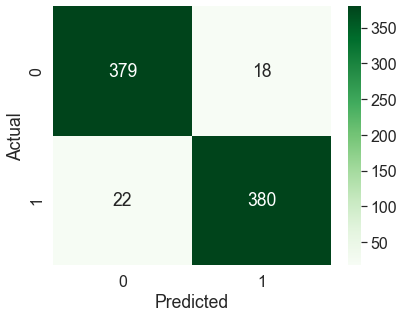

In [21]:
dt_cm = confusion_matrix(y_test, y_pred_dt)
sns.set(font_scale=1.5)
plt.figure(dpi=70)
sns.heatmap(dt_cm, annot=True, cmap='Greens', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### Dataset 2

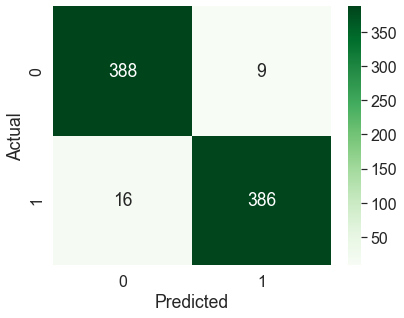

In [22]:
dt_cm2 = confusion_matrix(y_test2, y_pred_dt2)
sns.set(font_scale=1.5)
plt.figure(dpi=70)
sns.heatmap(dt_cm2, annot=True, cmap='Greens', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

<div style="background-color: #D9EAD3; border-radius: 10px; border: 1px solid #D2B48C; padding: 10px;">
    <h2 style="color: #8B4513; font-size: 24px;">Random Forest</h2>
</div>

</html>
  </body>
    </div>
     </div>
      <p style="color: #446A46;">The Random Forest formula:</p>
      <div style="color: #446A46;">
        <span style="color: #446A46;">\( y = \)</span>
        <span>\( \frac{1}{T} \sum_{t=1}^{T} f_t(x) \)</span>
      </div>
    </div>
  </body>
</html>


<div style="background-color: #D9EAD3; border-radius: 10px; border: 1px solid #D2B48C; padding: 10px;">
    <h2 style="color: #8B4513; font-size: 20px;">GridSearch for finding out the best hyperparameters</h2>
</div>

### Dataset 1

In [23]:
hyperparameters3 = [{
    'n_estimators': range(10,120,10),
    'criterion': ['gini', 'entropy'],
    'max_depth': [2, 5, 10],
    'max_features':[2,3,4]
}]

rf = RandomForestClassifier()
grid_search3 = GridSearchCV(rf, hyperparameters3, scoring='f1', cv=5, verbose=True, n_jobs=-1)
grid_search3.fit(X_train, y_train)

path_of_file = '/Users/jxhn/Desktop/IRONHACK/Week_9/Final_project/Models/'
with open(path_of_file + 'rf.pkl', 'wb') as model_file:
    pickle.dump(rf, model_file)

Fitting 5 folds for each of 198 candidates, totalling 990 fits


In [24]:
best_rf_params = grid_search.best_params_
best_rfscore = grid_search.best_score_
print("Best Parameters:", best_rf_params)
print("Best Score:", best_rfscore)

Best Parameters: {'criterion': 'entropy', 'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2}
Best Score: 0.9501020207297556


### Dataset 2

In [25]:
hyperparameters4 = [{
    'n_estimators': range(10,120,10),
    'criterion': ['gini', 'entropy'],
    'max_depth': [2, 5, 10],
    'max_features':[2,3,4]
}]

rf2 = RandomForestClassifier()
grid_search4 = GridSearchCV(rf2, hyperparameters4, scoring='f1', cv=5, verbose=True, n_jobs=-1)
grid_search4.fit(X_train2, y_train2)

path_of_file = '/Users/jxhn/Desktop/IRONHACK/Week_9/Final_project/Models/'
with open(path_of_file + 'rf2.pkl', 'wb') as model_file:
    pickle.dump(rf2, model_file)

Fitting 5 folds for each of 198 candidates, totalling 990 fits


In [26]:
best_rf_params2 = grid_search4.best_params_
best_rfscore2 = grid_search4.best_score_
print("Best Parameters:", best_rf_params2)
print("Best Score:", best_rfscore2)

Best Parameters: {'criterion': 'gini', 'max_depth': 10, 'max_features': 4, 'n_estimators': 110}
Best Score: 0.9441357860008829


<div style="background-color: #D9EAD3; border-radius: 10px; border: 1px solid #D2B48C; padding: 10px;">
    <h2 style="color: #8B4513; font-size: 20px;">Train X & y with best parameters</h2>
</div>

### Dataset 1

In [27]:
best_rf = RandomForestClassifier(**best_rf_params)
best_rf.fit(X_train, y_train.ravel())
y_pred_rf = best_rf.predict(X_test)

In [28]:
f13 = f1_score(y_test, y_pred_rf)
print("F1 Score on Test Set:", f13)

F1 Score on Test Set: 0.9737171464330412


In [29]:
print("Accuracy on test:", metrics.accuracy_score(y_test,y_pred_rf))
y_pred_rf_train = best_rf.predict(X_train)
print("Accuracy on train:", metrics.accuracy_score(y_train,y_pred_rf_train))
kappa_score15 = cohen_kappa_score(y_test, y_pred_rf)
print("Cohen's Kappa Score on test:", kappa_score15)

Accuracy on test: 0.9737171464330413
Accuracy on train: 1.0
Cohen's Kappa Score on test: 0.9474363512764205


### Dataset 2

In [30]:
best_rf2 = RandomForestClassifier(**best_rf_params2)
best_rf2.fit(X_train2, y_train2.ravel())
y_pred_rf2 = best_rf2.predict(X_test2)

In [31]:
f14 = f1_score(y_test2, y_pred_rf2)
print("F1 Score on Test Set:", f14)

F1 Score on Test Set: 0.9477611940298507


In [32]:
print("Accuracy on test:", metrics.accuracy_score(y_test2,y_pred_rf2))
y_pred_rf_train2 = best_rf2.predict(X_train2)
print("Accuracy on train:", metrics.accuracy_score(y_train2,y_pred_rf_train2))
kappa_score16 = cohen_kappa_score(y_test2, y_pred_rf2)
print("Cohen's Kappa Score on test:", kappa_score16)

Accuracy on test: 0.9474342928660826
Accuracy on train: 0.9846539304729095
Cohen's Kappa Score on test: 0.8948644685890447


<div style="background-color: #D9EAD3; border-radius: 10px; border: 1px solid #D2B48C; padding: 10px;">
    <h2 style="color: #8B4513; font-size: 20px;">Confusion Matrix for Random Forest</h2>
</div>

### Dataset 1

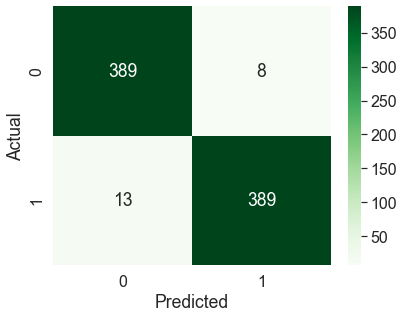

In [33]:
rf_cm = confusion_matrix(y_test, y_pred_rf)
sns.set(font_scale=1.5)
plt.figure(dpi=70)
sns.heatmap(rf_cm, annot=True, cmap='Greens', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### Dataset 2

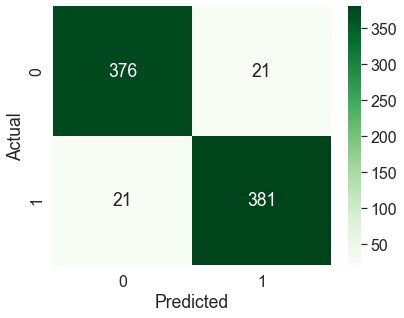

In [34]:
rf_cm2 = confusion_matrix(y_test2, y_pred_rf2)
sns.set(font_scale=1.5)
plt.figure(dpi=70)
sns.heatmap(rf_cm2, annot=True, cmap='Greens', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

<div style="background-color: #D9EAD3; border-radius: 10px; border: 1px solid #D2B48C; padding: 10px;">
    <h2 style="color: #8B4513; font-size: 24px;">ADA Boost</h2>
</div>

</html>
  </body>
    </div>
     </div>
        <p style="color: #446A46;">The ADABoost formula:</p>
      <div style="color: #446A46;">
        <span style="color: #446A46;">\( y = \)</span>
        <span>\( \sum_{t=1}^{T} \alpha_t f_t(x) \)</span>
      </div>
    </div>
  </body>
</html>

<div style="background-color: #D9EAD3; border-radius: 10px; border: 1px solid #D2B48C; padding: 10px;">
    <h2 style="color: #8B4513; font-size: 20px;">GridSearch for finding out the best hyperparameters</h2>
</div>

### Dataset 1

In [35]:
ada_params = [{
    'n_estimators': range(300, 400, 10),
    'learning_rate': [0.1, 0.5, 1.0]
}]

ada = AdaBoostClassifier()
ada_grid_search = GridSearchCV(ada, ada_params, scoring='f1', cv=5, verbose=True, n_jobs=-1)
ada_grid_search.fit(X_train, y_train)

path_of_file = '/Users/jxhn/Desktop/IRONHACK/Week_9/Final_project/Models/'
with open(path_of_file + 'ada1.pkl', 'wb') as model_file:
    pickle.dump(ada, model_file)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


In [36]:
best_ada_params = ada_grid_search.best_params_
best_adascore = ada_grid_search.best_score_

print("Best Parameters:", best_ada_params)
print("Best Score:", best_adascore)

Best Parameters: {'learning_rate': 1.0, 'n_estimators': 390}
Best Score: 0.8961476068376205


### Dataset 2

In [37]:
ada_params2 = [{
    'n_estimators': range(300, 400, 10),
    'learning_rate': [0.1, 0.5, 1.0]
}]

ada2 = AdaBoostClassifier()
ada_grid_search2 = GridSearchCV(ada2, ada_params2, scoring='f1', cv=5, verbose=True, n_jobs=-1)
ada_grid_search2.fit(X_train2, y_train2)

path_of_file = '/Users/jxhn/Desktop/IRONHACK/Week_9/Final_project/Models/'
with open(path_of_file + 'ada2.pkl', 'wb') as model_file:
    pickle.dump(ada2, model_file)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


In [38]:
best_ada_params2 = ada_grid_search2.best_params_
best_adascore2 = ada_grid_search2.best_score_

print("Best Parameters:", best_ada_params2)
print("Best Score:", best_adascore2)

Best Parameters: {'learning_rate': 1.0, 'n_estimators': 390}
Best Score: 0.8883452331195478


<div style="background-color: #D9EAD3; border-radius: 10px; border: 1px solid #D2B48C; padding: 10px;">
    <h2 style="color: #8B4513; font-size: 20px;">Train X & y with best parameters</h2>
</div>

### Dataset 1

In [39]:
best_ada = AdaBoostClassifier(**best_ada_params)
best_ada.fit(X_train, y_train)
y_pred_ada = best_ada.predict(X_test)

In [40]:
f1_ada = f1_score(y_test, y_pred_ada)
print("F1 Score on Test Set (ADABoost):", f1_ada)

F1 Score on Test Set (ADABoost): 0.9033078880407125


In [41]:
print("Accuracy on test (ADABoost):", metrics.accuracy_score(y_test, y_pred_ada))
y_pred_ada_train = best_ada.predict(X_train)
print("Accuracy on train (ADABoost):", metrics.accuracy_score(y_train, y_pred_ada_train))
kappa_score17 = cohen_kappa_score(y_test, y_pred_ada)
print("Cohen's Kappa Score on test:", kappa_score17)

Accuracy on test (ADABoost): 0.904881101376721
Accuracy on train (ADABoost): 0.9373629815220795
Cohen's Kappa Score on test: 0.8098083801577309


### Dataset 2

In [42]:
best_ada2 = AdaBoostClassifier(**best_ada_params2)
best_ada2.fit(X_train2, y_train2)
y_pred_ada2 = best_ada2.predict(X_test2)

In [43]:
f1_ada2 = f1_score(y_test2, y_pred_ada2)
print("F1 Score on Test Set (ADABoost):", f1_ada2)

F1 Score on Test Set (ADABoost): 0.900126422250316


In [44]:
print("Accuracy on test (ADABoost):", metrics.accuracy_score(y_test2, y_pred_ada2))
y_pred_ada_train2 = best_ada2.predict(X_train2)
print("Accuracy on train (ADABoost):", metrics.accuracy_score(y_train2, y_pred_ada_train2))
kappa_score18 = cohen_kappa_score(y_test2, y_pred_ada2)
print("Cohen's Kappa Score on test:", kappa_score18)

Accuracy on test (ADABoost): 0.9011264080100125
Accuracy on train (ADABoost): 0.9119949890385217
Cohen's Kappa Score on test: 0.8022853348284902


<div style="background-color: #D9EAD3; border-radius: 10px; border: 1px solid #D2B48C; padding: 10px;">
    <h2 style="color: #8B4513; font-size: 20px;">Confusion Matrix for ADA Boost</h2>
</div>

### Dataset 1

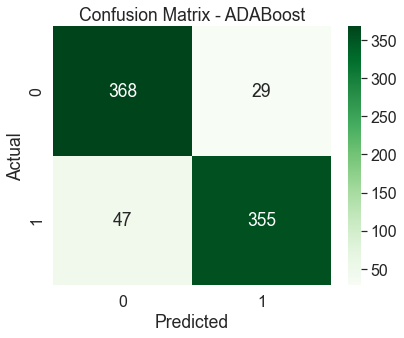

In [45]:
ada_cm = confusion_matrix(y_test, y_pred_ada)
plt.figure(dpi=70)
sns.heatmap(ada_cm, annot=True, cmap='Greens', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - ADABoost')
plt.show()

### Dataset 2

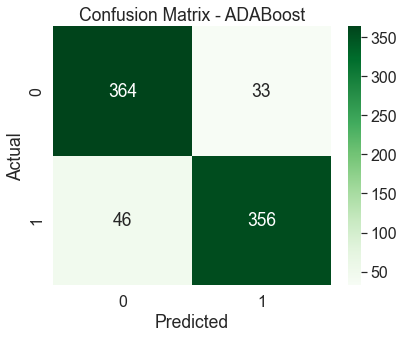

In [46]:
ada_cm2 = confusion_matrix(y_test2, y_pred_ada2)
plt.figure(dpi=70)
sns.heatmap(ada_cm2, annot=True, cmap='Greens', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - ADABoost')
plt.show()

<div style="background-color: #D9EAD3; border-radius: 10px; border: 1px solid #D2B48C; padding: 10px;">
    <h2 style="color: #8B4513; font-size: 24px;">XGBoost</h2>
</div>

</html>
  </body>
    </div>
     </div>
      <p style="color: #446A46;">The XGBoost formula:</p>
      <div style="color: #446A46;">
        <span style="color: #446A46;">\( y = \)</span>
        <span>\( \sum_{t=1}^{T} f_t(x) \)</span>
      </div>
    </div>
  </body>
</html>

<div style="background-color: #D9EAD3; border-radius: 10px; border: 1px solid #D2B48C; padding: 10px;">
    <h2 style="color: #8B4513; font-size: 20px;">GridSearch for finding out the best hyperparameters</h2>
</div>

### Dataset 1

In [47]:
xgb_params = [{
    'n_estimators': range(10, 50, 10),
    'learning_rate': [0.1, 0.5, 1.0],
    'max_depth': range(3,21,2)
}]

xgb = XGBClassifier()
xgb_grid_search = GridSearchCV(xgb, xgb_params, scoring='f1', cv=5, verbose=True, n_jobs=-1)
xgb_grid_search.fit(X_train, y_train)

path_of_file = '/Users/jxhn/Desktop/IRONHACK/Week_9/Final_project/Models/'
with open(path_of_file + 'xgb.pkl', 'wb') as model_file:
    pickle.dump(xgb, model_file)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


In [48]:
best_xgb_params = xgb_grid_search.best_params_
best_xgb_score = xgb_grid_search.best_score_

print("Best Parameters:", best_xgb_params)
print("Best Score:", best_xgb_score)

Best Parameters: {'learning_rate': 0.5, 'max_depth': 11, 'n_estimators': 40}
Best Score: 0.9555704539100468


### Dataset 2

In [49]:
xgb_params2 = [{
    'n_estimators': range(10, 50, 10),
    'learning_rate': [0.1, 0.5, 1.0],
    'max_depth': range(3,21,2)
}]

xgb2 = XGBClassifier()
xgb_grid_search2 = GridSearchCV(xgb2, xgb_params2, scoring='f1', cv=5, verbose=True, n_jobs=-1)
xgb_grid_search2.fit(X_train2, y_train2)

path_of_file = '/Users/jxhn/Desktop/IRONHACK/Week_9/Final_project/Models/'
with open(path_of_file + 'xgb2.pkl', 'wb') as model_file:
    pickle.dump(xgb2, model_file)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


In [50]:
best_xgb_params2 = xgb_grid_search2.best_params_
best_xgb_score2 = xgb_grid_search2.best_score_

print("Best Parameters:", best_xgb_params2)
print("Best Score:", best_xgb_score2)

Best Parameters: {'learning_rate': 0.5, 'max_depth': 9, 'n_estimators': 30}
Best Score: 0.9581316683930099


<div style="background-color: #D9EAD3; border-radius: 10px; border: 1px solid #D2B48C; padding: 10px;">
    <h2 style="color: #8B4513; font-size: 20px;">Train X & y with best parameters</h2>
</div>

### Dataset 1

In [51]:
best_xgb = XGBClassifier(**best_xgb_params)
best_xgb.fit(X_train, y_train)
y_pred_xgb = best_xgb.predict(X_test)

In [52]:
f1_xgb = f1_score(y_test, y_pred_xgb)
print("F1 Score on Test Set (XGBoost):", f1_xgb)

F1 Score on Test Set (XGBoost): 0.9698492462311556


In [53]:
print("Accuracy on test (XGBoost):", metrics.accuracy_score(y_test, y_pred_xgb))
y_pred_xgb_train = best_xgb.predict(X_train)
print("Accuracy on train (XGBoost):", metrics.accuracy_score(y_train, y_pred_xgb_train))
kappa_score19 = cohen_kappa_score(y_test, y_pred_xgb)
print("Cohen's Kappa Score on test:", kappa_score19)

Accuracy on test (XGBoost): 0.9699624530663329
Accuracy on train (XGBoost): 1.0
Cohen's Kappa Score on test: 0.9399300813211874


### Dataset 2

In [54]:
best_xgb2 = XGBClassifier(**best_xgb_params2)
best_xgb2.fit(X_train2, y_train2)
y_pred_xgb2 = best_xgb2.predict(X_test2)

In [55]:
f1_xgb2 = f1_score(y_test2, y_pred_xgb2)
print("F1 Score on Test Set (XGBoost):", f1_xgb2)

F1 Score on Test Set (XGBoost): 0.9623115577889448


In [56]:
print("Accuracy on test (XGBoost):", metrics.accuracy_score(y_test2, y_pred_xgb2))
y_pred_xgb_train2 = best_xgb2.predict(X_train2)
print("Accuracy on train (XGBoost):", metrics.accuracy_score(y_train2, y_pred_xgb_train2))
kappa_score20 = cohen_kappa_score(y_test2, y_pred_xgb2)
print("Cohen's Kappa Score on test:", kappa_score20)

Accuracy on test (XGBoost): 0.9624530663329162
Accuracy on train (XGBoost): 0.9990604447228312
Cohen's Kappa Score on test: 0.9249126016514841


<div style="background-color: #D9EAD3; border-radius: 10px; border: 1px solid #D2B48C; padding: 10px;">
    <h2 style="color: #8B4513; font-size: 20px;">Confusion Matrix for XGBoost</h2>
</div>

### Dataset 1

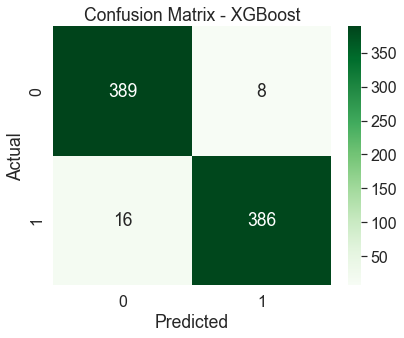

In [57]:
xgb_cm = confusion_matrix(y_test, y_pred_xgb)
plt.figure(dpi=70)
sns.heatmap(xgb_cm, annot=True, cmap='Greens', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - XGBoost')
plt.show()

### Dataset 2

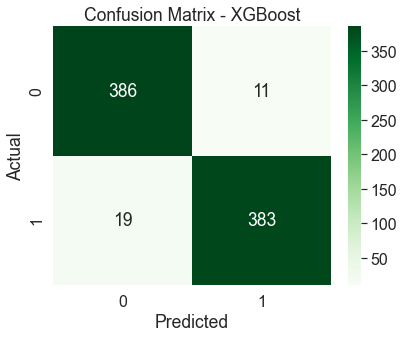

In [58]:
xgb_cm2 = confusion_matrix(y_test2, y_pred_xgb2)
plt.figure(dpi=70)
sns.heatmap(xgb_cm2, annot=True, cmap='Greens', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - XGBoost')
plt.show()

<div style="background-color: #D9EAD3; border-radius: 10px; border: 1px solid #D2B48C; padding: 10px;">
    <h2 style="color: #8B4513; font-size: 24px;">Logistic Regression</h2>
</div>

</html>
  </body>
    </div>
     </div>
      <p style="color: #446A46;">The Logistic Regression formula:</p>
      <div style="color: #446A46;">
        <span style="color: #446A46;">\( p = \)</span>
        <span>\( \frac{1}{{1 + e^{-(\beta_0 + \beta_1 x_1 + \beta_2 x_2 + \ldots + \beta_n x_n)}}} \)</span>
      </div>
      <p style="color: #446A46;">The sigmoid function:</p>
      <div style="color: #446A46;">
        <span style="color: #446A46;">\( \sigma(z) = \)</span>
        <span>\( \frac{1}{{1 + e^{-z}}} \)</span>
      </div>
    </div>
  </body>
</html>

<div style="background-color: #D9EAD3; border-radius: 10px; border: 1px solid #D2B48C; padding: 10px;">
    <h2 style="color: #8B4513; font-size: 20px;">GridSearch for finding out the best hyperparameters</h2>
</div>

### Dataset 1

In [59]:
lr_params = [{'C': [0.1, 1, 10]}]

lr = LogisticRegression()
lr_grid_search = GridSearchCV(lr, lr_params, scoring='f1', cv=5, verbose=True, n_jobs=-1)
lr_grid_search.fit(X_train, y_train)

path_of_file = '/Users/jxhn/Desktop/IRONHACK/Week_9/Final_project/Models/'
with open(path_of_file + 'lr1.pkl', 'wb') as model_file:
    pickle.dump(lr, model_file)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


In [60]:
best_lr_params = lr_grid_search.best_params_
best_lr_score = lr_grid_search.best_score_

print("Best Parameters:", best_lr_params)
print("Best Score:", best_lr_score)

Best Parameters: {'C': 0.1}
Best Score: 0.8696240171691934


### Dataset 2

In [61]:
lr_params2 = [{'C': [0.1, 1, 10]}]

lr2 = LogisticRegression()
lr_grid_search2 = GridSearchCV(lr2, lr_params2, scoring='f1', cv=5, verbose=True, n_jobs=-1)
lr_grid_search2.fit(X_train2, y_train2)

path_of_file = '/Users/jxhn/Desktop/IRONHACK/Week_9/Final_project/Models/'
with open(path_of_file + 'lr2.pkl', 'wb') as model_file:
    pickle.dump(lr2, model_file)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


In [62]:
best_lr_params2 = lr_grid_search2.best_params_
best_lr_score2 = lr_grid_search2.best_score_

print("Best Parameters:", best_lr_params2)
print("Best Score:", best_lr_score2)

Best Parameters: {'C': 0.1}
Best Score: 0.8671998702594264


<div style="background-color: #D9EAD3; border-radius: 10px; border: 1px solid #D2B48C; padding: 10px;">
    <h2 style="color: #8B4513; font-size: 20px;">Train X & y with best parameters</h2>
</div>

### Dataset 1

In [63]:
best_lr = LogisticRegression(**best_lr_params)
best_lr.fit(X_train, y_train)
y_pred_lr = best_lr.predict(X_test)

In [64]:
f1_lr = f1_score(y_test, y_pred_lr)
print("F1 Score on Test Set (Logistic Regression):", f1_lr)

F1 Score on Test Set (Logistic Regression): 0.8658227848101266


In [65]:
print("Accuracy on test set (Logistic Regression):", metrics.accuracy_score(y_test, y_pred_lr))
y_pred_lr_train = best_lr.predict(X_train)
print("Accuracy on train (Logistic Regression):", metrics.accuracy_score(y_train, y_pred_lr_train))
kappa_score21 = cohen_kappa_score(y_test, y_pred_lr)
print("Cohen's Kappa Score on test:", kappa_score21)

Accuracy on test set (Logistic Regression): 0.867334167709637
Accuracy on train (Logistic Regression): 0.871594112120263
Cohen's Kappa Score on test: 0.7347161230102299


### Dataset 2

In [66]:
best_lr2 = LogisticRegression(**best_lr_params2)
best_lr2.fit(X_train2, y_train2)
y_pred_lr2 = best_lr2.predict(X_test2)

In [67]:
f1_lr2 = f1_score(y_test2, y_pred_lr2)
print("F1 Score on Test Set (Logistic Regression):", f1_lr2)

F1 Score on Test Set (Logistic Regression): 0.8737373737373737


In [68]:
print("Accuracy on test set (Logistic Regression):", metrics.accuracy_score(y_test2, y_pred_lr2))
y_pred_lr_train2 = best_lr2.predict(X_train2)
print("Accuracy on train (Logistic Regression):", metrics.accuracy_score(y_train2, y_pred_lr_train2))
kappa_score22 = cohen_kappa_score(y_test2, y_pred_lr2)
print("Cohen's Kappa Score on test:", kappa_score22)

Accuracy on test set (Logistic Regression): 0.8748435544430538
Accuracy on train (Logistic Regression): 0.8675227059191982
Cohen's Kappa Score on test: 0.7497243522277351


<div style="background-color: #D9EAD3; border-radius: 10px; border: 1px solid #D2B48C; padding: 10px;">
    <h2 style="color: #8B4513; font-size: 20px;">Confusion Matrix for Logistic Regression</h2>
</div>

### Dataset 1

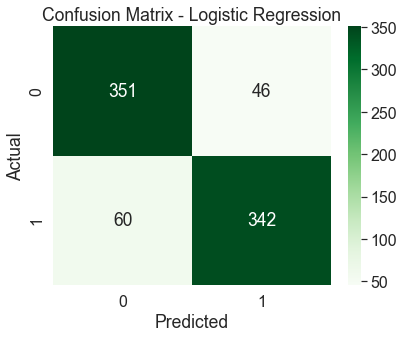

In [69]:
lr_cm = confusion_matrix(y_test, y_pred_lr)
plt.figure(dpi=70)
sns.heatmap(lr_cm, annot=True, cmap='Greens', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()

### Dataset 2

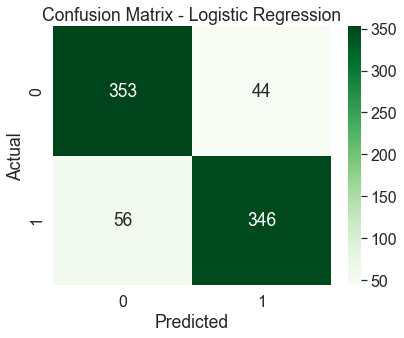

In [70]:
lr_cm2 = confusion_matrix(y_test2, y_pred_lr2)
plt.figure(dpi=70)
sns.heatmap(lr_cm2, annot=True, cmap='Greens', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()

<div style="background-color: #D9EAD3; border-radius: 10px; border: 1px solid #D2B48C; padding: 10px;">
    <h2 style="color: #8B4513; font-size: 24px;">Gaussain Naive Bayes</h2>
</div>

</html>
  </body>
    </div>
     </div>
      <p style="color: #446A46;">The Gaussian Naive Bayes formula:</p>
      <div style="color: #446A46;">
        <span style="color: #446A46;">\( P(C_k | x) = \)</span>
        <span>\( \frac{{P(C_k) \prod_{i=1}^{n} P(x_i | C_k)}}{{P(x)}} \)</span>
      </div>
    </div>
  </body>
</html>

<div style="background-color: #D9EAD3; border-radius: 10px; border: 1px solid #D2B48C; padding: 10px;">
    <h2 style="color: #8B4513; font-size: 20px;">GridSearch for finding out the best hyperparameters</h2>
</div>

### Dataset 1

In [71]:
# Define the hyperparameter grid
param_grid_gnb = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]
}

# Create a Gaussian Naive Bayes model
gnb = GaussianNB()

# Create GridSearchCV instance
grid_search = GridSearchCV(gnb, param_grid_gnb, cv=5, scoring='accuracy')

# Fit the grid search to your data
grid_search.fit(X, y)

path_of_file = '/Users/jxhn/Desktop/IRONHACK/Week_9/Final_project/Models/'
with open(path_of_file + 'gnb1.pkl', 'wb') as model_file:
    pickle.dump(gnb, model_file)

In [72]:
best_params_gnb = grid_search.best_params_
best_score_gnb = grid_search.best_score_

print("Best Parameters:", best_params_gnb)
print("Best Score:", best_score_gnb)

Best Parameters: {'var_smoothing': 1e-09}
Best Score: 0.8269080084441391


### Dataset 2

In [73]:
# Define the hyperparameter grid
param_grid_gnb2 = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]
}

# Create a Gaussian Naive Bayes model
gnb2 = GaussianNB()

# Create GridSearchCV instance
grid_search2 = GridSearchCV(gnb2, param_grid_gnb2, cv=5, scoring='accuracy')

# Fit the grid search to your data
grid_search2.fit(X2, y2)


path_of_file = '/Users/jxhn/Desktop/IRONHACK/Week_9/Final_project/Models/'
with open(path_of_file + 'gnb2.pkl', 'wb') as model_file:
    pickle.dump(gnb2, model_file)

In [74]:
best_params_gnb2 = grid_search2.best_params_
best_score_gnb2 = grid_search2.best_score_

print("Best Parameters:", best_params_gnb2)
print("Best Score:", best_score_gnb2)

Best Parameters: {'var_smoothing': 1e-09}
Best Score: 0.8191414079629611


<div style="background-color: #D9EAD3; border-radius: 10px; border: 1px solid #D2B48C; padding: 10px;">
    <h2 style="color: #8B4513; font-size: 20px;">Train X & y with best parameters</h2>
</div>

### Dataset 1

In [75]:
best_nb = GaussianNB(**best_params_gnb)
best_nb.fit(X_train, y_train)
y_pred_nb = best_nb.predict(X_test)

f1_nb = f1_score(y_test, y_pred_nb)
print("F1 Score on Test Set (Naive Bayes):", f1_nb)

F1 Score on Test Set (Naive Bayes): 0.8383838383838383


In [76]:
print("Accuracy on test set (Naive Bayes):", metrics.accuracy_score(y_test, y_pred_nb))
y_pred_nb_train = best_nb.predict(X_train)
print("Accuracy on train (Naive Bayes):", metrics.accuracy_score(y_train, y_pred_nb_train))
kappa_score23 = cohen_kappa_score(y_test, y_pred_nb)
print("Cohen's Kappa Score on test:", kappa_score23)

Accuracy on test set (Naive Bayes): 0.8397997496871089
Accuracy on train (Naive Bayes): 0.8224240526150955
Cohen's Kappa Score on test: 0.6796471708515011


### Dataset 2

In [77]:
best_nb2 = GaussianNB(**best_params_gnb2)
best_nb2.fit(X_train2, y_train2)
y_pred_nb2 = best_nb2.predict(X_test2)

f1_nb2 = f1_score(y_test2, y_pred_nb2)
print("F1 Score on Test Set (Naive Bayes):", f1_nb2)

F1 Score on Test Set (Naive Bayes): 0.8308457711442786


In [78]:
print("Accuracy on test set (Naive Bayes):", metrics.accuracy_score(y_test2, y_pred_nb2))
y_pred_nb_train2 = best_nb2.predict(X_train2)
print("Accuracy on train (Naive Bayes):", metrics.accuracy_score(y_train2, y_pred_nb_train2))
kappa_score24 = cohen_kappa_score(y_test2, y_pred_nb2)
print("Cohen's Kappa Score on test:", kappa_score24)

Accuracy on test set (Naive Bayes): 0.8297872340425532
Accuracy on train (Naive Bayes): 0.8152207954901347
Cohen's Kappa Score on test: 0.6595611363835734


<div style="background-color: #D9EAD3; border-radius: 10px; border: 1px solid #D2B48C; padding: 10px;">
    <h2 style="color: #8B4513; font-size: 20px;">Confusion Matrix for Gaussain Naive Bayes</h2>
</div>

### Dataset 1

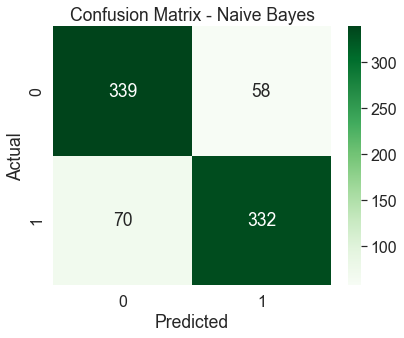

In [79]:
nb_cm = confusion_matrix(y_test, y_pred_nb)
plt.figure(dpi=70)
sns.heatmap(nb_cm, annot=True, cmap='Greens', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Naive Bayes')
plt.show()

### Dataset 2

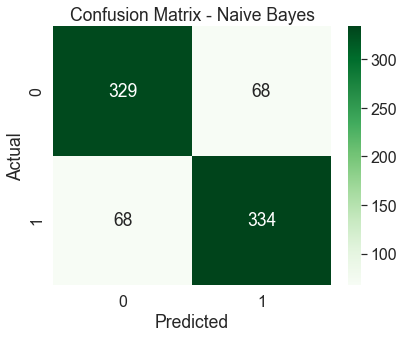

In [80]:
nb_cm2 = confusion_matrix(y_test2, y_pred_nb2)
plt.figure(dpi=70)
sns.heatmap(nb_cm2, annot=True, cmap='Greens', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Naive Bayes')
plt.show()

<div style="background-color: #D9EAD3; border-radius: 10px; border: 1px solid #D2B48C; padding: 10px;">
    <h2 style="color: #8B4513; font-size: 30px;">Gradient Boosting</h2>
</div>

</html>
  </body>
    </div>
     </div>
      <p style="color: #446A46;">The Prediction Function:</p>
      <div style="color: #446A46;">
        <span style="color: #446A46;">\( F(x) = \)</span>
        <span>\( \sum_{m=1}^{M} \beta_m f_m(x) \)</span>
      </div>
      <p style="color: #446A46;">The Loss Function:</p>
      <div style="color: #446A46;">
        <span style="color: #446A46;">\( L(y, F) = \)</span>
        <span>\( \sum_{i=1}^{n} l(y_i, F(x_i)) \)</span>
      </div>
      <p style="color: #446A46;">The Update Step:</p>
      <div style="color: #446A46;">
        <span style="color: #446A46;">\( \text{pseudo-residual} = \)</span>
        <span>\( -\frac{{\partial L(y, F)}}{{\partial F}} \)</span>
      </div>
    </div>
  </body>
</html>

<div style="background-color: #D9EAD3; border-radius: 10px; border: 1px solid #D2B48C; padding: 10px;">
    <h2 style="color: #8B4513; font-size: 20px;">GridSearch for finding out the best hyperparameters</h2>
</div>

### Dataset 1

In [81]:
gbm_params = [{
    'n_estimators': range(100, 150, 10),
    'learning_rate': [0.1, 0.5, 1.0],
    'max_depth': [2, 3, 4, 5]
}]

gbm = GradientBoostingClassifier()
gbm_grid_search = GridSearchCV(gbm, gbm_params, scoring='f1', cv=5, verbose=True, n_jobs=-1)
gbm_grid_search.fit(X_train, y_train)


path_of_file = '/Users/jxhn/Desktop/IRONHACK/Week_9/Final_project/Models/'
with open(path_of_file + 'gbm1.pkl', 'wb') as model_file:
    pickle.dump(gbm, model_file)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


In [82]:
best_gbm_params = gbm_grid_search.best_params_
best_gbm_score = gbm_grid_search.best_score_

print("Best Parameters:", best_gbm_params)
print("Best Score:", best_gbm_score)

Best Parameters: {'learning_rate': 0.5, 'max_depth': 4, 'n_estimators': 100}
Best Score: 0.9552724791223509


### Dataset 2

In [83]:
gbm_params2 = [{
    'n_estimators': range(100, 150, 10),
    'learning_rate': [0.1, 0.5, 1.0],
    'max_depth': [2, 3, 4, 5]
}]

gbm2 = GradientBoostingClassifier()
gbm_grid_search2 = GridSearchCV(gbm2, gbm_params2, scoring='f1', cv=5, verbose=True, n_jobs=-1)
gbm_grid_search2.fit(X_train2, y_train2)

path_of_file = '/Users/jxhn/Desktop/IRONHACK/Week_9/Final_project/Models/'
with open(path_of_file + 'gbm2.pkl', 'wb') as model_file:
    pickle.dump(gbm2, model_file)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


In [84]:
best_gbm_params2 = gbm_grid_search2.best_params_
best_gbm_score2 = gbm_grid_search2.best_score_

print("Best Parameters:", best_gbm_params2)
print("Best Score:", best_gbm_score2)

Best Parameters: {'learning_rate': 0.5, 'max_depth': 5, 'n_estimators': 130}
Best Score: 0.9564414769231891


<div style="background-color: #D9EAD3; border-radius: 10px; border: 1px solid #D2B48C; padding: 10px;">
    <h2 style="color: #8B4513; font-size: 20px;">Train X & y with best parameters</h2>
</div>

### Dataset 1

In [85]:
best_gbm = GradientBoostingClassifier(**best_gbm_params)
best_gbm.fit(X_train, y_train)
y_pred_gbm = best_gbm.predict(X_test)

In [86]:
f1_gbm = f1_score(y_test, y_pred_gbm)
print("F1 Score on Test Set (GBM):", f1_gbm)

F1 Score on Test Set (GBM): 0.9672544080604534


In [87]:
print("Accuracy on test set (GBM):", metrics.accuracy_score(y_test, y_pred_gbm))
y_pred_gbm_train = best_gbm.predict(X_train)
print("Accuracy on train (GBM):", metrics.accuracy_score(y_train, y_pred_gbm_train))
kappa_score25 = cohen_kappa_score(y_test, y_pred_gbm)
print("Cohen's Kappa Score on test:", kappa_score25)

Accuracy on test set (GBM): 0.967459324155194
Accuracy on train (GBM): 1.0
Cohen's Kappa Score on test: 0.9349262932357677


### Dataset 2

In [88]:
best_gbm2 = GradientBoostingClassifier(**best_gbm_params2)
best_gbm2.fit(X_train2, y_train2)
y_pred_gbm2 = best_gbm2.predict(X_test2)

In [89]:
f1_gbm2 = f1_score(y_test2, y_pred_gbm2)
print("F1 Score on Test Set (GBM):", f1_gbm2)

F1 Score on Test Set (GBM): 0.9687108886107636


In [90]:
print("Accuracy on test set (GBM):", metrics.accuracy_score(y_test2, y_pred_gbm2))
y_pred_gbm_train2 = best_gbm2.predict(X_train2)
print("Accuracy on train (GBM):", metrics.accuracy_score(y_train2, y_pred_gbm_train2))
kappa_score26 = cohen_kappa_score(y_test2, y_pred_gbm2)
print("Cohen's Kappa Score on test:", kappa_score26)

Accuracy on test set (GBM): 0.9687108886107635
Accuracy on train (GBM): 1.0
Cohen's Kappa Score on test: 0.9374242277100243


<div style="background-color: #D9EAD3; border-radius: 10px; border: 1px solid #D2B48C; padding: 10px;">
    <h2 style="color: #8B4513; font-size: 20px;">Confusion Matrix for Gradient Boosting</h2>
</div>

### Dataset 1

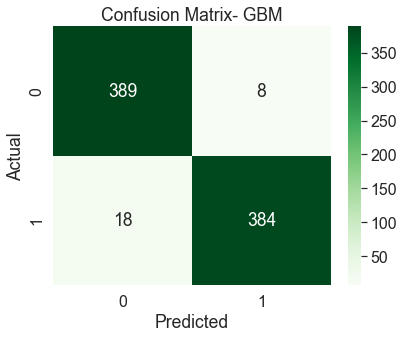

In [91]:
gbm_cm = confusion_matrix(y_test, y_pred_gbm)
plt.figure(dpi=70)
sns.heatmap(gbm_cm, annot=True, cmap='Greens', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix- GBM')
plt.show()

### Dataset 2

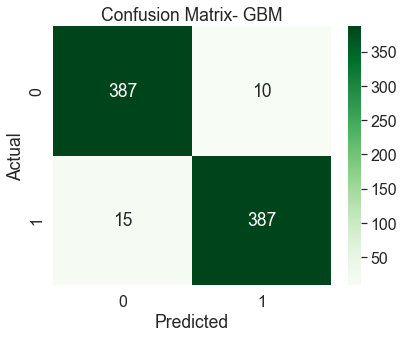

In [92]:
gbm_cm2 = confusion_matrix(y_test2, y_pred_gbm2)
plt.figure(dpi=70)
sns.heatmap(gbm_cm2, annot=True, cmap='Greens', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix- GBM')
plt.show()

<div style="background-color: #D9EAD3; border-radius: 10px; border: 1px solid #D2B48C; padding: 10px;">
    <h2 style="color: #8B4513; font-size: 30px;">Gradient Boosting Decision Trees (GBDT)</h2>
</div>

</html>
  </body>
    </div>
     </div>
      <p style="color: #446A46;">The Prediction Function:</p>
      <div style="color: #446A46;">
        <span style="color: #446A46;">\( F(x) = \)</span>
        <span>\( \sum_{m=1}^{M} f_m(x) \)</span>
      </div>
      <p style="color: #446A46;">The Loss Function:</p>
      <div style="color: #446A46;">
        <span style="color: #446A46;">\( L(y, F) = \)</span>
        <span>\( \sum_{i=1}^{n} l(y_i, F(x_i)) \)</span>
      </div>
      <p style="color: #446A46;">The Update Step:</p>
      <div style="color: #446A46;">
        <span style="color: #446A46;">\( \text{pseudo-residual} = \)</span>
        <span>\( -\frac{{\partial L(y, F)}}{{\partial F}} \)</span>
      </div>
    </div>
  </body>
</html>

<div style="background-color: #D9EAD3; border-radius: 10px; border: 1px solid #D2B48C; padding: 10px;">
    <h2 style="color: #8B4513; font-size: 20px;">GridSearch for finding out the best hyperparameters</h2>
</div>

### Dataset 1

In [93]:
gbdt_params = [{
    'n_estimators': range(100, 200, 10),
    'learning_rate': [0.1, 0.5, 1.0],
    'max_depth': range(3,11,2)
}]

gbdt = GradientBoostingClassifier()
gbdt_grid_search = GridSearchCV(gbdt, gbdt_params, scoring='f1', cv=5, verbose=True, n_jobs=-1)
gbdt_grid_search.fit(X_train, y_train)

path_of_file = '/Users/jxhn/Desktop/IRONHACK/Week_9/Final_project/Models/'
with open(path_of_file + 'gbdt1.pkl', 'wb') as model_file:
    pickle.dump(gbdt, model_file)

Fitting 5 folds for each of 120 candidates, totalling 600 fits


In [94]:
best_gbdt_params = gbdt_grid_search.best_params_
best_gbdt_score = gbdt_grid_search.best_score_

print("Best Parameters:", best_gbdt_params)
print("Best Score:", best_gbdt_score)

Best Parameters: {'learning_rate': 0.5, 'max_depth': 9, 'n_estimators': 120}
Best Score: 0.9600120193246721


### Dataset 2

In [95]:
gbdt_params2 = [{
    'n_estimators': range(100, 200, 10),
    'learning_rate': [0.1, 0.5, 1.0],
    'max_depth': range(3,11,2)
}]

gbdt2 = GradientBoostingClassifier()
gbdt_grid_search2 = GridSearchCV(gbdt2, gbdt_params2, scoring='f1', cv=5, verbose=True, n_jobs=-1)
gbdt_grid_search2.fit(X_train2, y_train2)

path_of_file = '/Users/jxhn/Desktop/IRONHACK/Week_9/Final_project/Models/'
with open(path_of_file + 'gbdt2.pkl', 'wb') as model_file:
    pickle.dump(gbdt2, model_file)

Fitting 5 folds for each of 120 candidates, totalling 600 fits


In [96]:
best_gbdt_params2 = gbdt_grid_search2.best_params_
best_gbdt_score2 = gbdt_grid_search2.best_score_

print("Best Parameters:", best_gbdt_params2)
print("Best Score:", best_gbdt_score2)

Best Parameters: {'learning_rate': 0.5, 'max_depth': 9, 'n_estimators': 140}
Best Score: 0.9592243276569011


<div style="background-color: #D9EAD3; border-radius: 10px; border: 1px solid #D2B48C; padding: 10px;">
    <h2 style="color: #8B4513; font-size: 20px;">Train X & y with best parameters</h2>
</div>

### Dataset 1

In [97]:
best_gbdt = GradientBoostingClassifier(**best_gbdt_params)
best_gbdt.fit(X_train, y_train)
y_pred_gbdt = best_gbdt.predict(X_test)

In [98]:
f1_gbdt = f1_score(y_test, y_pred_gbdt)
print("F1 Score on Test Set (GBDT):", f1_gbdt)

F1 Score on Test Set (GBDT): 0.9672544080604534


In [99]:
print("Accuracy on test set (GBDT):", metrics.accuracy_score(y_test, y_pred_gbdt))
y_pred_gbdt_train = best_gbdt.predict(X_train)
print("Accuracy on train (GBDT):", metrics.accuracy_score(y_train, y_pred_gbdt_train))
kappa_score27 = cohen_kappa_score(y_test, y_pred_gbdt)
print("Cohen's Kappa Score on test:", kappa_score27)

Accuracy on test set (GBDT): 0.967459324155194
Accuracy on train (GBDT): 1.0
Cohen's Kappa Score on test: 0.9349262932357677


### Dataset 2

In [100]:
best_gbdt2 = GradientBoostingClassifier(**best_gbdt_params2)
best_gbdt2.fit(X_train2, y_train2)
y_pred_gbdt2 = best_gbdt2.predict(X_test2)

In [101]:
f1_gbdt2 = f1_score(y_test2, y_pred_gbdt2)
print("F1 Score on Test Set (GBDT):", f1_gbdt2)

F1 Score on Test Set (GBDT): 0.9737171464330412


In [102]:
print("Accuracy on test set (GBDT):", metrics.accuracy_score(y_test2, y_pred_gbdt2))
y_pred_gbdt_train2 = best_gbdt2.predict(X_train2)
print("Accuracy on train (GBDT):", metrics.accuracy_score(y_train2, y_pred_gbdt_train2))
kappa_score28 = cohen_kappa_score(y_test2, y_pred_gbdt2)
print("Cohen's Kappa Score on test:", kappa_score28)

Accuracy on test set (GBDT): 0.9737171464330413
Accuracy on train (GBDT): 1.0
Cohen's Kappa Score on test: 0.9474363512764205


<div style="background-color: #D9EAD3; border-radius: 10px; border: 1px solid #D2B48C; padding: 10px;">
    <h2 style="color: #8B4513; font-size: 20px;">Confusion Matrix for Gradient Boosting Decision Trees</h2>
</div>

### Dataset 1

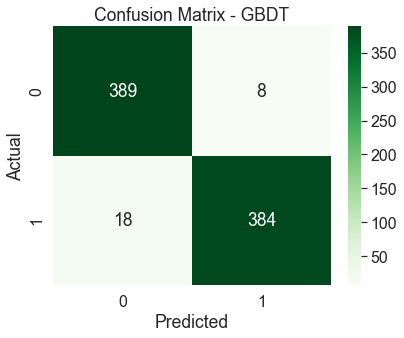

In [103]:
gbdt_cm = confusion_matrix(y_test, y_pred_gbdt)
plt.figure(dpi=70)
sns.heatmap(gbdt_cm, annot=True, cmap='Greens', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - GBDT')
plt.show()

### Dataset 2

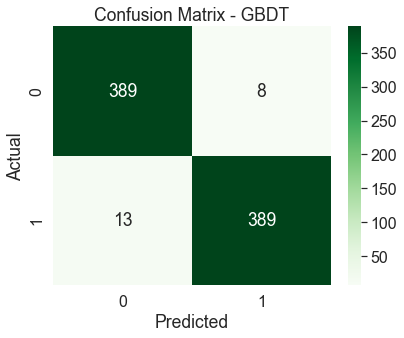

In [104]:
gbdt_cm2 = confusion_matrix(y_test2, y_pred_gbdt2)
plt.figure(dpi=70)
sns.heatmap(gbdt_cm2, annot=True, cmap='Greens', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - GBDT')
plt.show()

<div style="background-color: #D9EAD3; border-radius: 10px; border: 1px solid #D2B48C; padding: 10px;">
    <h2 style="color: #8B4513; font-size: 20px;">Finding the best model</h2>
</div>

In [105]:
accuracy_scores = {}

accuracy_scores['Random Forest'] = metrics.accuracy_score(y_test, y_pred_rf)
accuracy_scores['Decision Tree'] = metrics.accuracy_score(y_test, y_pred_dt)
accuracy_scores['ADABoost'] = metrics.accuracy_score(y_test, y_pred_ada)
accuracy_scores['XGBoost'] = metrics.accuracy_score(y_test, y_pred_xgb)
accuracy_scores['Logistic Regression'] = metrics.accuracy_score(y_test, y_pred_lr)
accuracy_scores['Naive Bayes'] = metrics.accuracy_score(y_test, y_pred_nb)
accuracy_scores['Gradient Boosting'] = metrics.accuracy_score(y_test, y_pred_gbm)
accuracy_scores['Gradient Boosting Decision Trees'] = metrics.accuracy_score(y_test, y_pred_gbdt)

# Sort accuracy_scores in descending order by values (accuracy)
sorted_scores = {k: v for k, v in sorted(accuracy_scores.items(), key=lambda item: item[1], reverse=True)}

best_method = next(iter(sorted_scores))
best_accuracy = sorted_scores[best_method]

print("Accuracy on Test Dataset 1 Leaderboard:")
for rank, (method, accuracy) in enumerate(sorted_scores.items(), start=1):
    print(f"{rank}. {method}: {accuracy:.4f}")

print(f"\nBest Method: {best_method}")
print(f"With Accuracy of: {best_accuracy:.4f}")
print()
print()
Kappa_scores = {}

Kappa_scores['Random Forest'] = metrics.accuracy_score(y_test, y_pred_rf)
Kappa_scores['Decision Tree'] = metrics.accuracy_score(y_test, y_pred_dt)
Kappa_scores['ADABoost'] = metrics.accuracy_score(y_test, y_pred_ada)
Kappa_scores['XGBoost'] = metrics.accuracy_score(y_test, y_pred_xgb)
Kappa_scores['Logistic Regression'] = metrics.accuracy_score(y_test, y_pred_lr)
Kappa_scores['Naive Bayes'] = metrics.accuracy_score(y_test, y_pred_nb)
Kappa_scores['Gradient Boosting'] = metrics.accuracy_score(y_test, y_pred_gbm)
Kappa_scores['Gradient Boosting Decision Trees'] = metrics.accuracy_score(y_test, y_pred_gbdt)

# Sort accuracy_scores in descending order by values (accuracy)
sortedk_scores = {k: v for k, v in sorted(Kappa_scores.items(), key=lambda item: item[1], reverse=True)}

bestk_method = next(iter(sortedk_scores))
bestk_accuracy = sortedk_scores[bestk_method]

print("Cohen Kappa score on Test Dataset 1 Leaderboard:")
for rank, (method, accuracy) in enumerate(sortedk_scores.items(), start=1):
    print(f"{rank}. {method}: {accuracy:.4f}")

print(f"\nBest Method: {bestk_method}")
print(f"With Cohen Kappa score of: {bestk_accuracy:.4f}")
print()
print()
f1_scores = {}

f1_scores['Random Forest'] = f1_score(y_test, y_pred_rf)
f1_scores['Decision Tree'] = f1_score(y_test, y_pred_dt)
f1_scores['ADABoost'] = f1_score(y_test, y_pred_ada)
f1_scores['XGBoost'] = f1_score(y_test, y_pred_xgb)
f1_scores['Logistic Regression'] = f1_score(y_test, y_pred_lr)
f1_scores['Naive Bayes'] = f1_score(y_test, y_pred_nb)
f1_scores['Gradient Boosting'] = f1_score(y_test, y_pred_gbm)
f1_scores['Gradient Boosting Decision Trees'] = f1_score(y_test, y_pred_gbdt)

# Sort accuracy_scores in descending order by values (accuracy)
sortedf1_scores = {k: v for k, v in sorted(f1_scores.items(), key=lambda item: item[1], reverse=True)}

bestf1_method = next(iter(sortedf1_scores))
bestf1_accuracy = sortedf1_scores[bestf1_method]

print("F1 score on Test Dataset 1 Leaderboard:")
for rank, (method, accuracy) in enumerate(sortedf1_scores.items(), start=1):
    print(f"{rank}. {method}: {accuracy:.4f}")

print(f"\nBest Method: {bestf1_method}")
print(f"With F1 score of: {bestf1_accuracy:.4f}")


Accuracy on Test Dataset 1 Leaderboard:
1. Random Forest: 0.9737
2. XGBoost: 0.9700
3. Gradient Boosting: 0.9675
4. Gradient Boosting Decision Trees: 0.9675
5. Decision Tree: 0.9499
6. ADABoost: 0.9049
7. Logistic Regression: 0.8673
8. Naive Bayes: 0.8398

Best Method: Random Forest
With Accuracy of: 0.9737


Cohen Kappa score on Test Dataset 1 Leaderboard:
1. Random Forest: 0.9737
2. XGBoost: 0.9700
3. Gradient Boosting: 0.9675
4. Gradient Boosting Decision Trees: 0.9675
5. Decision Tree: 0.9499
6. ADABoost: 0.9049
7. Logistic Regression: 0.8673
8. Naive Bayes: 0.8398

Best Method: Random Forest
With Cohen Kappa score of: 0.9737


F1 score on Test Dataset 1 Leaderboard:
1. Random Forest: 0.9737
2. XGBoost: 0.9698
3. Gradient Boosting: 0.9673
4. Gradient Boosting Decision Trees: 0.9673
5. Decision Tree: 0.9500
6. ADABoost: 0.9033
7. Logistic Regression: 0.8658
8. Naive Bayes: 0.8384

Best Method: Random Forest
With F1 score of: 0.9737


In [106]:
accuracy_scores2 = {}

accuracy_scores2['Random Forest'] = metrics.accuracy_score(y_test2, y_pred_rf2)
accuracy_scores2['Decision Tree'] = metrics.accuracy_score(y_test2, y_pred_dt2)
accuracy_scores2['ADABoost'] = metrics.accuracy_score(y_test2, y_pred_ada2)
accuracy_scores2['XGBoost'] = metrics.accuracy_score(y_test2, y_pred_xgb2)
accuracy_scores2['Logistic Regression'] = metrics.accuracy_score(y_test2, y_pred_lr2)
accuracy_scores2['Naive Bayes'] = metrics.accuracy_score(y_test2, y_pred_nb2)
accuracy_scores2['Gradient Boosting'] = metrics.accuracy_score(y_test2, y_pred_gbm2)
accuracy_scores2['Gradient Boosting Decision Trees'] = metrics.accuracy_score(y_test2, y_pred_gbdt2)

# Sort accuracy_scores in descending order by values (accuracy)
sorted_scores2 = {k: v for k, v in sorted(accuracy_scores2.items(), key=lambda item: item[1], reverse=True)}

best_method2 = next(iter(sorted_scores2))
best_accuracy2 = sorted_scores[best_method2]

print("Accuracy on Test Dataset 2 Leaderboard:")
for rank, (method, accuracy) in enumerate(sorted_scores2.items(), start=1):
    print(f"{rank}. {method}: {accuracy:.4f}")

print(f"\nBest Method: {best_method2}")
print(f"With Accuracy of: {best_accuracy2:.4f}")
print()
print()
Kappa_scores2 = {}

Kappa_scores2['Random Forest'] = metrics.accuracy_score(y_test2, y_pred_rf2)
Kappa_scores2['Decision Tree'] = metrics.accuracy_score(y_test2, y_pred_dt2)
Kappa_scores2['ADABoost'] = metrics.accuracy_score(y_test2, y_pred_ada2)
Kappa_scores2['XGBoost'] = metrics.accuracy_score(y_test2, y_pred_xgb2)
Kappa_scores2['Logistic Regression'] = metrics.accuracy_score(y_test2, y_pred_lr2)
Kappa_scores2['Naive Bayes'] = metrics.accuracy_score(y_test2, y_pred_nb2)
Kappa_scores2['Gradient Boosting'] = metrics.accuracy_score(y_test2, y_pred_gbm2)
Kappa_scores2['Gradient Boosting Decision Trees'] = metrics.accuracy_score(y_test2, y_pred_gbdt2)

# Sort accuracy_scores in descending order by values (accuracy)
sortedk_scores2 = {k: v for k, v in sorted(Kappa_scores2.items(), key=lambda item: item[1], reverse=True)}

bestk_method2 = next(iter(sortedk_scores2))
bestk_accuracy2 = sortedk_scores2[bestk_method2]

print("Cohen Kappa score on Test Dataset 2 Leaderboard:")
for rank, (method, accuracy) in enumerate(sortedk_scores2.items(), start=1):
    print(f"{rank}. {method}: {accuracy:.4f}")

print(f"\nBest Method: {bestk_method2}")
print(f"With Cohen Kappa score of: {bestk_accuracy2:.4f}")
print()
print()
f1_scores2 = {}

f1_scores2['Random Forest'] = f1_score(y_test2, y_pred_rf2)
f1_scores2['Decision Tree'] = f1_score(y_test2, y_pred_dt2)
f1_scores2['ADABoost'] = f1_score(y_test2, y_pred_ada2)
f1_scores2['XGBoost'] = f1_score(y_test2, y_pred_xgb2)
f1_scores2['Logistic Regression'] = f1_score(y_test2, y_pred_lr2)
f1_scores2['Naive Bayes'] = f1_score(y_test2, y_pred_nb2)
f1_scores2['Gradient Boosting'] = f1_score(y_test2, y_pred_gbm2)
f1_scores2['Gradient Boosting Decision Trees'] = f1_score(y_test2, y_pred_gbdt2)

# Sort accuracy_scores in descending order by values (accuracy)
sortedf1_scores2 = {k: v for k, v in sorted(f1_scores2.items(), key=lambda item: item[1], reverse=True)}

bestf1_method2 = next(iter(sortedf1_scores2))
bestf1_accuracy2 = sortedf1_scores2[bestf1_method2]

print("F1 score on Test Dataset 2 Leaderboard:")
for rank, (method, accuracy) in enumerate(sortedf1_scores2.items(), start=1):
    print(f"{rank}. {method}: {accuracy:.4f}")

print(f"\nBest Method: {bestf1_method2}")
print(f"With F1 score of: {bestf1_accuracy2:.4f}")


Accuracy on Test Dataset 2 Leaderboard:
1. Gradient Boosting Decision Trees: 0.9737
2. Decision Tree: 0.9687
3. Gradient Boosting: 0.9687
4. XGBoost: 0.9625
5. Random Forest: 0.9474
6. ADABoost: 0.9011
7. Logistic Regression: 0.8748
8. Naive Bayes: 0.8298

Best Method: Gradient Boosting Decision Trees
With Accuracy of: 0.9675


Cohen Kappa score on Test Dataset 2 Leaderboard:
1. Gradient Boosting Decision Trees: 0.9737
2. Decision Tree: 0.9687
3. Gradient Boosting: 0.9687
4. XGBoost: 0.9625
5. Random Forest: 0.9474
6. ADABoost: 0.9011
7. Logistic Regression: 0.8748
8. Naive Bayes: 0.8298

Best Method: Gradient Boosting Decision Trees
With Cohen Kappa score of: 0.9737


F1 score on Test Dataset 2 Leaderboard:
1. Gradient Boosting Decision Trees: 0.9737
2. Gradient Boosting: 0.9687
3. Decision Tree: 0.9686
4. XGBoost: 0.9623
5. Random Forest: 0.9478
6. ADABoost: 0.9001
7. Logistic Regression: 0.8737
8. Naive Bayes: 0.8308

Best Method: Gradient Boosting Decision Trees
With F1 score of: 0

In [107]:
# Accuracy scores for Dataset 1
accuracy_scores = {
    'Random Forest': metrics.accuracy_score(y_test, y_pred_rf),
    'Decision Tree': metrics.accuracy_score(y_test, y_pred_dt),
    'ADABoost': metrics.accuracy_score(y_test, y_pred_ada),
    'XGBoost': metrics.accuracy_score(y_test, y_pred_xgb),
    'Logistic Regression': metrics.accuracy_score(y_test, y_pred_lr),
    'Naive Bayes': metrics.accuracy_score(y_test, y_pred_nb),
    'Gradient Boosting': metrics.accuracy_score(y_test, y_pred_gbm),
    'Gradient Boosting Decision Trees': metrics.accuracy_score(y_test, y_pred_gbdt)
}

# Accuracy scores for Dataset 2
accuracy_scores2 = {
    'Random Forest 2': metrics.accuracy_score(y_test2, y_pred_rf2),
    'Decision Tree 2': metrics.accuracy_score(y_test2, y_pred_dt2),
    'ADABoost 2': metrics.accuracy_score(y_test2, y_pred_ada2),
    'XGBoost 2': metrics.accuracy_score(y_test2, y_pred_xgb2),
    'Logistic Regression 2': metrics.accuracy_score(y_test2, y_pred_lr2),
    'Naive Bayes 2': metrics.accuracy_score(y_test2, y_pred_nb2),
    'Gradient Boosting 2': metrics.accuracy_score(y_test2, y_pred_gbm2),
    'Gradient Boosting Decision Trees 2': metrics.accuracy_score(y_test2, y_pred_gbdt2)
}

# Combine Accuracy scores from both datasets
combined_accuracy_scores = {**accuracy_scores, **accuracy_scores2}

# Sort Accuracy scores in descending order
sorted_accuracy_scores = {k: v for k, v in sorted(combined_accuracy_scores.items(), key=lambda item: item[1], reverse=True)}

# Display top 10 Accuracy Scores leaderboard
print("Top 10 Accuracy Scores Leaderboard:")
print("Rank | Method                                      | Score  | Dataset")
print("-" * 70)
for rank, (method, score) in enumerate(sorted_accuracy_scores.items(), start=1):
    dataset_name = "Dataset 1" if method in accuracy_scores else "Dataset 2"
    print(f"{rank:4d} | {method:<40} | {score:.4f} | {dataset_name}")
    if rank == 10:
        break


Top 10 Accuracy Scores Leaderboard:
Rank | Method                                      | Score  | Dataset
----------------------------------------------------------------------
   1 | Random Forest                            | 0.9737 | Dataset 1
   2 | Gradient Boosting Decision Trees 2       | 0.9737 | Dataset 2
   3 | XGBoost                                  | 0.9700 | Dataset 1
   4 | Decision Tree 2                          | 0.9687 | Dataset 2
   5 | Gradient Boosting 2                      | 0.9687 | Dataset 2
   6 | Gradient Boosting                        | 0.9675 | Dataset 1
   7 | Gradient Boosting Decision Trees         | 0.9675 | Dataset 1
   8 | XGBoost 2                                | 0.9625 | Dataset 2
   9 | Decision Tree                            | 0.9499 | Dataset 1
  10 | Random Forest 2                          | 0.9474 | Dataset 2


In [108]:
# Cohen Kappa scores for Dataset 1
kappa_scores = {
    'Random Forest': cohen_kappa_score(y_test, y_pred_rf),
    'Decision Tree': cohen_kappa_score(y_test, y_pred_dt),
    'ADABoost': cohen_kappa_score(y_test, y_pred_ada),
    'XGBoost': cohen_kappa_score(y_test, y_pred_xgb),
    'Logistic Regression': cohen_kappa_score(y_test, y_pred_lr),
    'Naive Bayes': cohen_kappa_score(y_test, y_pred_nb),
    'Gradient Boosting': cohen_kappa_score(y_test, y_pred_gbm),
    'Gradient Boosting Decision Trees': cohen_kappa_score(y_test, y_pred_gbdt)
}

# Cohen Kappa scores for Dataset 2
kappa_scores2 = {
    'Random Forest 2': cohen_kappa_score(y_test2, y_pred_rf2),
    'Decision Tree 2': cohen_kappa_score(y_test2, y_pred_dt2),
    'ADABoost 2': cohen_kappa_score(y_test2, y_pred_ada2),
    'XGBoost 2': cohen_kappa_score(y_test2, y_pred_xgb2),
    'Logistic Regression 2': cohen_kappa_score(y_test2, y_pred_lr2),
    'Naive Bayes 2': cohen_kappa_score(y_test2, y_pred_nb2),
    'Gradient Boosting 2': cohen_kappa_score(y_test2, y_pred_gbm2),
    'Gradient Boosting Decision Trees 2': cohen_kappa_score(y_test2, y_pred_gbdt2)
}

# Combine Cohen Kappa scores from both datasets
combined_kappa_scores = {**kappa_scores, **kappa_scores2}

# Sort Cohen Kappa scores in descending order
sorted_kappa_scores = {k: v for k, v in sorted(combined_kappa_scores.items(), key=lambda item: item[1], reverse=True)}

# Display top 10 Cohen Kappa Scores leaderboard
print("Top 10 Cohen Kappa Scores Leaderboard:")
print("Rank | Method                                      | Score  | Dataset")
print("-" * 70)
for rank, (method, score) in enumerate(sorted_kappa_scores.items(), start=1):
    dataset_name = "Dataset 1" if method in kappa_scores else "Dataset 2"
    print(f"{rank:4d} | {method:<40} | {score:.4f} | {dataset_name}")
    if rank == 10:
        break


Top 10 Cohen Kappa Scores Leaderboard:
Rank | Method                                      | Score  | Dataset
----------------------------------------------------------------------
   1 | Random Forest                            | 0.9474 | Dataset 1
   2 | Gradient Boosting Decision Trees 2       | 0.9474 | Dataset 2
   3 | XGBoost                                  | 0.9399 | Dataset 1
   4 | Decision Tree 2                          | 0.9374 | Dataset 2
   5 | Gradient Boosting 2                      | 0.9374 | Dataset 2
   6 | Gradient Boosting                        | 0.9349 | Dataset 1
   7 | Gradient Boosting Decision Trees         | 0.9349 | Dataset 1
   8 | XGBoost 2                                | 0.9249 | Dataset 2
   9 | Decision Tree                            | 0.8999 | Dataset 1
  10 | Random Forest 2                          | 0.8949 | Dataset 2


In [109]:
# F1 scores for Dataset 1
f1_scores = {
    'Random Forest': f1_score(y_test, y_pred_rf),
    'Decision Tree': f1_score(y_test, y_pred_dt),
    'ADABoost': f1_score(y_test, y_pred_ada),
    'XGBoost': f1_score(y_test, y_pred_xgb),
    'Logistic Regression': f1_score(y_test, y_pred_lr),
    'Naive Bayes': f1_score(y_test, y_pred_nb),
    'Gradient Boosting': f1_score(y_test, y_pred_gbm),
    'Gradient Boosting Decision Trees': f1_score(y_test, y_pred_gbdt)
}

# F1 scores for Dataset 2
f1_scores2 = {
    'Random Forest 2': f1_score(y_test2, y_pred_rf2),
    'Decision Tree 2': f1_score(y_test2, y_pred_dt2),
    'ADABoost 2': f1_score(y_test2, y_pred_ada2),
    'XGBoost 2': f1_score(y_test2, y_pred_xgb2),
    'Logistic Regression 2': f1_score(y_test2, y_pred_lr2),
    'Naive Bayes 2': f1_score(y_test2, y_pred_nb2),
    'Gradient Boosting 2': f1_score(y_test2, y_pred_gbm2),
    'Gradient Boosting Decision Trees 2': f1_score(y_test2, y_pred_gbdt2)
}

# Combine F1 scores from both datasets
combined_f1_scores = {**f1_scores, **f1_scores2}

# Sort F1 scores in descending order
sorted_f1_scores = {k: v for k, v in sorted(combined_f1_scores.items(), key=lambda item: item[1], reverse=True)}

# Display top 10 F1 Scores leaderboard
print("Top 10 F1 Scores Leaderboard:")
print("Rank | Method                                      | Score  | Dataset")
print("-" * 70)
for rank, (method, score) in enumerate(sorted_f1_scores.items(), start=1):
    dataset_name = "Dataset 1" if method in f1_scores else "Dataset 2"
    print(f"{rank:4d} | {method:<40} | {score:.4f} | {dataset_name}")
    if rank == 10:
        break


Top 10 F1 Scores Leaderboard:
Rank | Method                                      | Score  | Dataset
----------------------------------------------------------------------
   1 | Random Forest                            | 0.9737 | Dataset 1
   2 | Gradient Boosting Decision Trees 2       | 0.9737 | Dataset 2
   3 | XGBoost                                  | 0.9698 | Dataset 1
   4 | Gradient Boosting 2                      | 0.9687 | Dataset 2
   5 | Decision Tree 2                          | 0.9686 | Dataset 2
   6 | Gradient Boosting                        | 0.9673 | Dataset 1
   7 | Gradient Boosting Decision Trees         | 0.9673 | Dataset 1
   8 | XGBoost 2                                | 0.9623 | Dataset 2
   9 | Decision Tree                            | 0.9500 | Dataset 1
  10 | Random Forest 2                          | 0.9478 | Dataset 2


# Adding previous notebook to new notebook

<div style="background-color: #D9EAD3; border-radius: 10px; border: 1px solid #D2B48C; padding: 10px;">
    <h2 style="color: #8B4513;">Scalers & Transformers</h2>
</div>

## Standard Scaler

### Dataset 1

In [110]:
scaler = StandardScaler()
X_train_stanscaled = scaler.fit_transform(X_train)
X_test_stanscaled = scaler.fit_transform(X_test)

### Dataset 2

In [111]:
scaler = StandardScaler()
X_train_stanscaled2 = scaler.fit_transform(X_train2)
X_test_stanscaled2 = scaler.fit_transform(X_test2)

## MinMax Scaler

### Dataset 1

In [112]:
scaler = MinMaxScaler()
X_train_minmaxscaled = scaler.fit_transform(X_train)
X_test_minmaxscaled = scaler.fit_transform(X_test)


### Dataset 2

In [113]:
scaler = MinMaxScaler()
X_train_minmaxscaled2 = scaler.fit_transform(X_train2)
X_test_minmaxscaled2 = scaler.fit_transform(X_test2)


<div style="background-color: #D9EAD3; border-radius: 10px; border: 1px solid #D2B48C; padding: 10px;">
    <h2 style="color: #8B4513; font-size: 24px;">Neural Networks</h2>
</div>

<div style="background-color: #D9EAD3; border-radius: 10px; border: 1px solid #D2B48C; padding: 10px;">
    <h2 style="color: #8B4513; font-size: 20px;">Neural Network for MinMaxScaled Data (Using Sigmoid Activation) with Dataset 1:</h2>
</div>

In [114]:
# Define the neural network architecture
model_minmax = keras.Sequential([
    keras.layers.Dense(64, activation='sigmoid', input_dim=X_train_minmaxscaled.shape[1]),
    keras.layers.Dense(32, activation='sigmoid'),
    keras.layers.Dense(1, activation='sigmoid')  # Binary classification output
])

# Compile the model
model_minmax.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model_minmax.summary() # 30 coef * 10 = 300 samples

# Train the model
history = model_minmax.fit(X_train_minmaxscaled, y_train, epochs=10, batch_size=32, validation_split=0.1)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                704       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2817 (11.00 KB)
Trainable params: 2817 (11.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10
90/90 [==============================] - 0s 1ms/step - loss: 0.6940 - accuracy: 0.5082 - val_loss: 0.6868 - val_accuracy: 0.5906
Epoch 2/10
90/90 [==============================] - 0s 545us/step - loss: 0.6829 - accuracy: 0.5799 - val_loss: 0.6756 - val_accuracy: 0.8250
Epoc

In [115]:
# Evaluate the model on the test set
test_loss, test_acc = model_minmax.evaluate(X_test_minmaxscaled, y_test)
print("Min-Max Scaled Test Data accuracy (D1):", test_acc)

# Predictions from the MinMaxScaled model
y_pred_minmax = model_minmax.predict(X_test_minmaxscaled)
y_pred_minmax = (y_pred_minmax > 0.5).astype(int)  # Convert probabilities to binary predictions

# Calculate F1-score for the MinMaxScaled model
f1_minmax = f1_score(y_test, y_pred_minmax)
print("F1-score on Test Set for MinMaxScaled Model (D1):", f1_minmax)
print()
kappa_score = cohen_kappa_score(y_test, y_pred_minmax)
print("Cohen's Kappa Score on test (D1):", kappa_score)

25/25 [==============================] - 0s 418us/step - loss: 0.3298 - accuracy: 0.8686
Min-Max Scaled Test Data accuracy (D1): 0.8685857057571411
25/25 [==============================] - 0s 299us/step
F1-score on Test Set for MinMaxScaled Model (D1): 0.8721071863580999

Cohen's Kappa Score on test (D1): 0.7370911586541022


<div style="background-color: #D9EAD3; border-radius: 10px; border: 1px solid #D2B48C; padding: 10px;">
    <h2 style="color: #8B4513; font-size: 20px;">Neural Network for MinMaxScaled Data (Using Sigmoid Activation) with Dataset 2:</h2>
</div>

In [116]:
# Define the neural network architecture
model_minmax2 = keras.Sequential([
    keras.layers.Dense(64, activation='sigmoid', input_dim=X_train_minmaxscaled2.shape[1]),
    keras.layers.Dense(32, activation='sigmoid'),
    keras.layers.Dense(1, activation='sigmoid')  # Binary classification output
])

# Compile the model
model_minmax2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model_minmax2.summary() # 30 coef * 10 = 300 samples

# Train the model
history2 = model_minmax2.fit(X_train_minmaxscaled2, y_train2, epochs=10, batch_size=32, validation_split=0.1)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 64)                640       
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dense_5 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2753 (10.75 KB)
Trainable params: 2753 (10.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10
90/90 [==============================] - 0s 988us/step - loss: 0.6950 - accuracy: 0.4998 - val_loss: 0.6827 - val_accuracy: 0.7344
Epoch 2/10
90/90 [==============================] - 0s 518us/step - loss: 0.6752 - accuracy: 0.6676 - val_loss: 0.6646 - val_accuracy: 0.7812


In [117]:
test_loss2, test_acc2 = model_minmax2.evaluate(X_test_minmaxscaled2, y_test2)
print("Min-Max Scaled Test Data accuracy (D2):", test_acc2)

# Predictions from the MinMaxScaled model
y_pred_minmax2 = model_minmax2.predict(X_test_minmaxscaled2)
y_pred_minmax2 = (y_pred_minmax2 > 0.5).astype(int)  # Convert probabilities to binary predictions

# Calculate F1-score for the MinMaxScaled model
f1_minmax2 = f1_score(y_test2, y_pred_minmax2)
print("F1-score on Test Set for MinMaxScaled Model (D2):", f1_minmax2)
print()
kappa_score2 = cohen_kappa_score(y_test2, y_pred_minmax2)
print("Cohen's Kappa Score on test (D2):", kappa_score2)

25/25 [==============================] - 0s 416us/step - loss: 0.3024 - accuracy: 0.8698
Min-Max Scaled Test Data accuracy (D2): 0.8698372840881348
25/25 [==============================] - 0s 291us/step
F1-score on Test Set for MinMaxScaled Model (D2): 0.8719211822660099

Cohen's Kappa Score on test (D2): 0.7396317695865241


<div style="background-color: #D9EAD3; border-radius: 10px; border: 1px solid #D2B48C; padding: 10px;">
    <h2 style="color: #8B4513; font-size: 20px;">Time for some fine tuning for Dataset 1</h2>
</div>

In [118]:
#tf.random.set_seed(12)
# Define the neural network architecture
model_minmax3 = Sequential([
    Dense(128, activation='sigmoid', input_dim=X_train_minmaxscaled.shape[1]),
    Dense(64, activation='sigmoid'),
    Dense(32, activation='sigmoid'),
    Dense(1, activation='sigmoid')  # Binary classification output
])

# Compile the model
model_minmax3.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Implement early stopping to prevent overfitting
early_stopping3 = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

model_minmax3.summary()

# Train the model with hyperparameter tuning
history3 = model_minmax3.fit(
    X_train_minmaxscaled, y_train,
    epochs=20, batch_size=300,
    validation_split=0.1,
    callbacks=[early_stopping3]
)


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 128)               1408      
                                                                 
 dense_7 (Dense)             (None, 64)                8256      
                                                                 
 dense_8 (Dense)             (None, 32)                2080      
                                                                 
 dense_9 (Dense)             (None, 1)                 33        
                                                                 
Total params: 11777 (46.00 KB)
Trainable params: 11777 (46.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/20
10/10 [==============================] - 0s 8ms/step - loss: 0.6951 - accuracy: 0.5144 - val_loss: 0.6952 - val_accuracy: 0.4969
Epoch 2/20

In [119]:
# Evaluate the model on the test set
test_loss3, test_acc3 = model_minmax3.evaluate(X_test_minmaxscaled, y_test)
print("Tuned Min-Max Scaled Test Data accuracy (D1):", test_acc3)

# Predictions from the MinMaxScaled model
y_pred_minmax3 = model_minmax3.predict(X_test_minmaxscaled)
y_pred_minmax3 = (y_pred_minmax3 > 0.5).astype(int)  # Convert probabilities to binary predictions

# Calculate F1-score for the MinMaxScaled model
f1_minmax3 = f1_score(y_test, y_pred_minmax3)
print("F1-score for Test Data for the Tuned MinMaxScaled Model (D1):", f1_minmax3)
print()
kappa_score3 = cohen_kappa_score(y_test, y_pred_minmax3)
print("Cohen's Kappa Score on test (D1):", kappa_score3)

25/25 [==============================] - 0s 384us/step - loss: 0.5033 - accuracy: 0.8398
Tuned Min-Max Scaled Test Data accuracy (D1): 0.8397997617721558
25/25 [==============================] - 0s 329us/step
F1-score for Test Data for the Tuned MinMaxScaled Model (D1): 0.8571428571428571

Cohen's Kappa Score on test (D1): 0.6791245199668683


<div style="background-color: #D9EAD3; border-radius: 10px; border: 1px solid #D2B48C; padding: 10px;">
    <h2 style="color: #8B4513; font-size: 20px;">Time for some fine tuning for Dataset 2</h2>
</div>

In [120]:
model_minmax4 = Sequential([
    Dense(128, activation='sigmoid', input_dim=X_train_minmaxscaled2.shape[1]),
    Dense(64, activation='sigmoid'),
    Dense(32, activation='sigmoid'),
    Dense(1, activation='sigmoid')  # Binary classification output
])

# Compile the model
model_minmax4.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Implement early stopping to prevent overfitting
early_stopping4 = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

model_minmax4.summary()

# Train the model with hyperparameter tuning
history4 = model_minmax4.fit(
    X_train_minmaxscaled2, y_train2,
    epochs=20, batch_size=300,
    validation_split=0.1,
    callbacks=[early_stopping4]
)


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 128)               1280      
                                                                 
 dense_11 (Dense)            (None, 64)                8256      
                                                                 
 dense_12 (Dense)            (None, 32)                2080      
                                                                 
 dense_13 (Dense)            (None, 1)                 33        
                                                                 
Total params: 11649 (45.50 KB)
Trainable params: 11649 (45.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/20
10/10 [==============================] - 0s 7ms/step - loss: 0.7792 - accuracy: 0.5012 - val_loss: 0.7031 - val_accuracy: 0.4969
Epoch 2/20

In [121]:
# Evaluate the model on the test set
test_loss4, test_acc4 = model_minmax4.evaluate(X_test_minmaxscaled2, y_test2)
print("Tuned Min-Max Scaled Test Data accuracy (D2):", test_acc)

# Predictions from the MinMaxScaled model
y_pred_minmax4 = model_minmax4.predict(X_test_minmaxscaled2)
y_pred_minmax4 = (y_pred_minmax4 > 0.5).astype(int)  # Convert probabilities to binary predictions

# Calculate F1-score for the MinMaxScaled model
f1_minmax4 = f1_score(y_test2, y_pred_minmax4)
print("F1-score for Test Data for the tuned MinMaxScaled Model (D2):", f1_minmax4)
print()
kappa_score4 = cohen_kappa_score(y_test2, y_pred_minmax4)
print("Cohen's Kappa Score on test:", kappa_score4)

25/25 [==============================] - 0s 410us/step - loss: 0.6013 - accuracy: 0.8661
Tuned Min-Max Scaled Test Data accuracy (D2): 0.8685857057571411
25/25 [==============================] - 0s 314us/step
F1-score for Test Data for the tuned MinMaxScaled Model (D2): 0.8736717827626919

Cohen's Kappa Score on test: 0.7319741796327588


<div style="background-color: #D9EAD3; border-radius: 10px; border: 1px solid #D2B48C; padding: 10px;">
    <h2 style="color: #8B4513; font-size: 20px;">Neural Network for StandardScaled Data (Using ReLU Activation) using Dataset 1:</h2>
</div>

In [122]:
model_standard5 = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_dim=X_train_stanscaled.shape[1]),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')  # Binary classification output
])

# Compile the model
model_standard5.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model_standard5.summary()

# Train the model
model_standard5.fit(X_train_stanscaled, y_train, epochs=10, batch_size=32, validation_split=0.1)

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 64)                704       
                                                                 
 dense_15 (Dense)            (None, 32)                2080      
                                                                 
 dense_16 (Dense)            (None, 1)                 33        
                                                                 
Total params: 2817 (11.00 KB)
Trainable params: 2817 (11.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10
90/90 [==============================] - 0s 999us/step - loss: 0.4409 - accuracy: 0.8082 - val_loss: 0.3498 - val_accuracy: 0.8687
Epoch 2/10
90/90 [==============================] - 0s 529us/step - loss: 0.3017 - accuracy: 0.8737 - val_loss: 0.3406 - val_accuracy: 0.8750


In [123]:
test_loss5, test_acc5 = model_standard5.evaluate(X_test_stanscaled, y_test)
print("Standard Scaled Test Data accuracy (D1):", test_acc5)

y_pred_standard5 = model_standard5.predict(X_test_stanscaled)
y_pred_standard5 = (y_pred_standard5 > 0.5).astype(int)  # Convert probabilities to binary predictions

# Calculate F1-score for the StandardScaled model
f1_standard5 = f1_score(y_test, y_pred_standard5)
print("F1-score for Test Data for StandardScaled Model (D1):", f1_standard5)
print()
kappa_score5 = cohen_kappa_score(y_test, y_pred_standard5)
print("Cohen's Kappa Score on test data:", kappa_score5)

25/25 [==============================] - 0s 388us/step - loss: 0.2740 - accuracy: 0.8849
Standard Scaled Test Data accuracy (D1): 0.8848560452461243
25/25 [==============================] - 0s 288us/step
F1-score for Test Data for StandardScaled Model (D1): 0.8829516539440204

Cohen's Kappa Score on test data: 0.7697680391383058


<div style="background-color: #D9EAD3; border-radius: 10px; border: 1px solid #D2B48C; padding: 10px;">
    <h2 style="color: #8B4513; font-size: 20px;">Time for some fine tuning for Dataset 1</h2>
</div>

In [124]:
# Define the neural network architecture
model_standard6 = Sequential([
    Dense(128, activation='relu', input_dim=X_train_stanscaled.shape[1]),
    Dropout(0.3),  # Adding dropout for regularization
    Dense(64, activation='relu'),
    Dropout(0.2),  # Adding dropout for regularization
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')  # Binary classification output
])

# Compile the model
model_standard6.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Implement early stopping to prevent overfitting
early_stopping6 = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
model_standard6.summary()

# Train the model with hyperparameter tuning
history6  = model_standard6.fit(
    X_train_stanscaled, y_train,
    epochs=20, batch_size=300,
    validation_split=0.1,
    callbacks=[early_stopping6]
)


Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_17 (Dense)            (None, 128)               1408      
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_18 (Dense)            (None, 64)                8256      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_19 (Dense)            (None, 32)                2080      
                                                                 
 dense_20 (Dense)            (None, 1)                 33        
                                                                 
Total params: 11777 (46.00 KB)
Trainable params: 11777

In [125]:
test_loss6, test_acc6 = model_standard6.evaluate(X_test_stanscaled, y_test)
print("Tuned Standard Scaled Test Data accuracy (D1):", test_acc6)

# Predictions from the StandardScaled model
y_pred_standard6 = model_standard6.predict(X_test_stanscaled)
y_pred_standard6 = (y_pred_standard6 > 0.5).astype(int)  # Convert probabilities to binary predictions

# Calculate F1-score for the StandardScaled model
f1_standard6 = f1_score(y_test, y_pred_standard6)
print("F1-score for Test Data for the Tuned StandardScaled Model (D1):", f1_standard6)
print()
kappa_score6 = cohen_kappa_score(y_test, y_pred_standard6)
print("Cohen's Kappa Score on test:", kappa_score6)

25/25 [==============================] - 0s 442us/step - loss: 0.2772 - accuracy: 0.8874
Tuned Standard Scaled Test Data accuracy (D1): 0.8873592019081116
25/25 [==============================] - 0s 339us/step
F1-score for Test Data for the Tuned StandardScaled Model (D1): 0.8875000000000001

Cohen's Kappa Score on test: 0.7747236911355605


<div style="background-color: #D9EAD3; border-radius: 10px; border: 1px solid #D2B48C; padding: 10px;">
    <h2 style="color: #8B4513; font-size: 20px;">Neural Network for StandardScaled Data (Using ReLU Activation) using Dataset 2:</h2>
</div>

In [126]:
model_standard7 = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_dim=X_train_stanscaled2.shape[1]),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')  # Binary classification output
])

# Compile the model
model_standard7.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model_standard7.summary()

# Train the model
model_standard7.fit(X_train_stanscaled2, y_train2, epochs=10, batch_size=32, validation_split=0.1)

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_21 (Dense)            (None, 64)                640       
                                                                 
 dense_22 (Dense)            (None, 32)                2080      
                                                                 
 dense_23 (Dense)            (None, 1)                 33        
                                                                 
Total params: 2753 (10.75 KB)
Trainable params: 2753 (10.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10
90/90 [==============================] - 0s 969us/step - loss: 0.4130 - accuracy: 0.8392 - val_loss: 0.3544 - val_accuracy: 0.8531
Epoch 2/10
90/90 [==============================] - 0s 526us/step - loss: 0.3130 - accuracy: 0.8670 - val_loss: 0.3524 - val_accuracy: 0.8687


In [127]:
# Evaluate the model on the test set
test_loss7, test_acc7 = model_standard7.evaluate(X_test_stanscaled2, y_test2)
print("Standard Scaled Test Data accuracy (D2):", test_acc7)

# Predictions from the StandardScaled model
y_pred_standard7 = model_standard7.predict(X_test_stanscaled2)
y_pred_standard7 = (y_pred_standard7 > 0.5).astype(int)  # Convert probabilities to binary predictions

# Calculate F1-score for the StandardScaled model
f1_standard7 = f1_score(y_test2, y_pred_standard7)
print("F1-score for Test Data for StandardScaled Model (D2):", f1_standard7)
print()
kappa_score7 = cohen_kappa_score(y_test2, y_pred_standard7)
print("Cohen's Kappa Score on test data:", kappa_score7)

25/25 [==============================] - 0s 412us/step - loss: 0.2784 - accuracy: 0.8786
Standard Scaled Test Data accuracy (D2): 0.8785982728004456
25/25 [==============================] - 0s 313us/step
F1-score for Test Data for StandardScaled Model (D2): 0.8776796973518284

Cohen's Kappa Score on test data: 0.7572288194259545


<div style="background-color: #D9EAD3; border-radius: 10px; border: 1px solid #D2B48C; padding: 10px;">
    <h2 style="color: #8B4513; font-size: 20px;">Time for some fine tuning for Dataset 2</h2>
</div>

In [128]:
# Define the neural network architecture
model_standard8 = Sequential([
    Dense(128, activation='relu', input_dim=X_train_stanscaled2.shape[1]),
    Dropout(0.3),  # Adding dropout for regularization
    Dense(64, activation='relu'),
    Dropout(0.2),  # Adding dropout for regularization
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')  # Binary classification output
])

# Compile the model
model_standard8.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Implement early stopping to prevent overfitting
early_stopping8 = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
model_standard8.summary()

# Train the model with hyperparameter tuning
history8 = model_standard8.fit(
    X_train_stanscaled2, y_train2,
    epochs=20, batch_size=300,
    validation_split=0.1,
    callbacks=[early_stopping8]
)


Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 128)               1280      
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_25 (Dense)            (None, 64)                8256      
                                                                 
 dropout_3 (Dropout)         (None, 64)                0         
                                                                 
 dense_26 (Dense)            (None, 32)                2080      
                                                                 
 dense_27 (Dense)            (None, 1)                 33        
                                                                 
Total params: 11649 (45.50 KB)
Trainable params: 11649

In [129]:
# Evaluate the model on the test set
test_loss8, test_acc8 = model_standard8.evaluate(X_test_stanscaled2, y_test2)
print("Tuned Standard Scaled Data Test accuracy (D2):", test_acc8)

# Predictions from the StandardScaled model
y_pred_standard8 = model_standard8.predict(X_test_stanscaled2)
y_pred_standard8 = (y_pred_standard8 > 0.5).astype(int)  # Convert probabilities to binary predictions

# Calculate F1-score for the StandardScaled model
f1_standard8 = f1_score(y_test2, y_pred_standard8)
print("F1-score for Test Data for the Tuned StandardScaled Model (D2):", f1_standard8)
print()
kappa_score8 = cohen_kappa_score(y_test2, y_pred_standard8)
print("Cohen's Kappa Score on test:", kappa_score8)

25/25 [==============================] - 0s 439us/step - loss: 0.2793 - accuracy: 0.8811
Tuned Standard Scaled Data Test accuracy (D2): 0.8811013698577881
25/25 [==============================] - 0s 329us/step
F1-score for Test Data for the Tuned StandardScaled Model (D2): 0.8816936488169365

Cohen's Kappa Score on test: 0.7621971659779506


<div style="background-color: #D9EAD3; border-radius: 10px; border: 1px solid #D2B48C; padding: 10px;">
    <h2 style="color: #8B4513; font-size: 30px;">K-Nearest Neighbors (KNN)</h2>
</div>

In [130]:
hyperparameters = [{
    'n_neighbors': range(3,21,2),
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}]

knn = KNeighborsClassifier()
grid_search = GridSearchCV(knn, hyperparameters, scoring='f1', cv=5, verbose=True, n_jobs=-1)
grid_search.fit(X_train_stanscaled, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid=[{'n_neighbors': range(3, 21, 2), 'p': [1, 2],
                          'weights': ['uniform', 'distance']}],
             scoring='f1', verbose=True)

In [131]:
best_knn_params = grid_search.best_params_
best_knnscore = grid_search.best_score_
print(best_knn_params)
print(best_knnscore)

{'n_neighbors': 13, 'p': 1, 'weights': 'distance'}
0.9536716737618554


In [132]:
best_knn = KNeighborsClassifier(**best_knn_params)
best_knn.fit(X_train_stanscaled, y_train.ravel())
y_pred_knn = best_knn.predict(X_test_stanscaled)

In [133]:
print('F1 Score on test data for dataset 1: ', f1_score(y_test, best_knn.predict(X_test_stanscaled), average='weighted'))
print()
kappa_score9 = cohen_kappa_score(y_test, y_pred_knn)
print("Cohen's Kappa Score on test:", kappa_score9)
print()
print("Accuracy (KNN) for test set for dataset 1:", metrics.accuracy_score(y_test, y_pred_knn))

F1 Score on test data for dataset 1:  0.9511885274575095

Cohen's Kappa Score on test: 0.9023726200956818

Accuracy (KNN) for test set for dataset 1: 0.951188986232791


## Dataset 2

In [134]:
hyperparameters2 = [{
    'n_neighbors': range(3,21,2),
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}]

knn2 = KNeighborsClassifier()
grid_search2 = GridSearchCV(knn, hyperparameters, scoring='f1', cv=5, verbose=True, n_jobs=-1)
grid_search2.fit(X_train_stanscaled2, y_train2)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid=[{'n_neighbors': range(3, 21, 2), 'p': [1, 2],
                          'weights': ['uniform', 'distance']}],
             scoring='f1', verbose=True)

In [135]:
best_knn_params2 = grid_search2.best_params_
best_knnscore2 = grid_search2.best_score_
print(best_knn_params2)
print(best_knnscore2)

{'n_neighbors': 19, 'p': 1, 'weights': 'distance'}
0.9537008537483439


In [136]:
best_knn2 = KNeighborsClassifier(**best_knn_params2)
best_knn2.fit(X_train_stanscaled2, y_train2.ravel())
y_pred_knn2 = best_knn2.predict(X_test_stanscaled2)

In [137]:
print('F1 Score on test data for dataset 2: ', f1_score(y_test2, best_knn2.predict(X_test_stanscaled2), average='weighted'))
print()
kappa_score10 = cohen_kappa_score(y_test2, y_pred_knn2)
print("Cohen's Kappa Score on test:", kappa_score10)
print()
print("Accuracy (KNN) for test set for dataset 2:", metrics.accuracy_score(y_test2, y_pred_knn2))

F1 Score on test data for dataset 2:  0.886065867149092

Cohen's Kappa Score on test: 0.7721599508653403

Accuracy (KNN) for test set for dataset 2: 0.886107634543179


<div style="background-color: #D9EAD3; border-radius: 10px; border: 1px solid #D2B48C; padding: 10px;">
    <h2 style="color: #8B4513; font-size: 30px;">Support Vector Machines (SVM)</h2>
</div>

### Dataset 1

In [138]:
svm_params = [{'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}]

svm = SVC()
svm_grid_search = GridSearchCV(svm, svm_params, scoring='f1', cv=5, verbose=True, n_jobs=-1)
svm_grid_search.fit(X_train_stanscaled, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid=[{'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}],
             scoring='f1', verbose=True)

In [139]:
best_svm_params = svm_grid_search.best_params_
best_svmscore = grid_search.best_score_
print("Best Parameters:", best_svm_params)
print("Best Score:", best_svmscore)

Best Parameters: {'C': 10, 'kernel': 'rbf'}
Best Score: 0.9536716737618554


In [140]:
best_svm = SVC(**best_svm_params)
best_svm.fit(X_train_stanscaled, y_train)
y_pred_svm = best_svm.predict(X_test_stanscaled)

In [141]:
f1_svm = f1_score(y_test, y_pred_svm)
print("F1 Score on Test Set (SVM) for dataset 1:", f1_svm)

print("Accuracy (SVM) for test set for dataset 1:", metrics.accuracy_score(y_test, y_pred_svm))
y_pred_svm_train = best_svm.predict(X_train_stanscaled)
print("Accuracy on train (SVM) for dataset 1:", metrics.accuracy_score(y_train, y_pred_svm_train))
print("Accuracy on test (SVM) for dataset 1:", metrics.accuracy_score(y_test, y_pred_svm))
kappa_score11 = cohen_kappa_score(y_test, y_pred_svm)
print("Cohen's Kappa Score on test:", kappa_score11)

F1 Score on Test Set (SVM) for dataset 1: 0.8955223880597015
Accuracy (SVM) for test set for dataset 1: 0.8948685857321652
Accuracy on train (SVM) for dataset 1: 0.9069840275602882
Accuracy on test (SVM) for dataset 1: 0.8948685857321652
Cohen's Kappa Score on test: 0.7897289371780893


### Dataset 2

In [142]:
svm_params2 = [{'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}]

svm2 = SVC()
svm_grid_search2 = GridSearchCV(svm2, svm_params2, scoring='f1', cv=5, verbose=True, n_jobs=-1)
svm_grid_search2.fit(X_train_stanscaled2, y_train2)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid=[{'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}],
             scoring='f1', verbose=True)

In [143]:
best_svm_params2 = svm_grid_search2.best_params_
best_svmscore2 = grid_search.best_score_
print("Best Parameters:",best_svm_params2)
print("Best Score:", best_svmscore2)

Best Parameters: {'C': 10, 'kernel': 'rbf'}
Best Score: 0.9536716737618554


In [144]:
best_svm2 = SVC(**best_svm_params2)
best_svm2.fit(X_train_stanscaled2, y_train2)
y_pred_svm2 = best_svm2.predict(X_test_stanscaled2)

In [145]:
f1_svm2 = f1_score(y_test2, y_pred_svm2)
print("F1 Score on Test Set (SVM) for dataset 2:", f1_svm2)
print("Accuracy (SVM) for test set for dataset 2:", metrics.accuracy_score(y_test2, y_pred_svm2))
y_pred_svm_train2 = best_svm2.predict(X_train_stanscaled2)
print("Accuracy on train (SVM) for dataset 2:", metrics.accuracy_score(y_train2, y_pred_svm_train2))
print("ACcuracy on test (SVM) for dataset 2:", metrics.accuracy_score(y_test2, y_pred_svm2))
kappa_score12 = cohen_kappa_score(y_test2, y_pred_svm2)
print("Cohen's Kappa Score on test:", kappa_score12)

F1 Score on Test Set (SVM) for dataset 2: 0.8793969849246231
Accuracy (SVM) for test set for dataset 2: 0.8798498122653317
Accuracy on train (SVM) for dataset 2: 0.8787973692452239
ACcuracy on test (SVM) for dataset 2: 0.8798498122653317
Cohen's Kappa Score on test: 0.7597203252847494


<div style="background-color: #D9EAD3; border-radius: 10px; border: 1px solid #D2B48C; padding: 10px;">
    <h2 style="color: #8B4513; font-size: 20px;">Finding the Overall Best Model</h2>
</div>

In [146]:
accuracy_scores = {}

accuracy_scores['Random Forest'] = metrics.accuracy_score(y_test, y_pred_rf)
accuracy_scores['Decision Tree'] = metrics.accuracy_score(y_test, y_pred_dt)
accuracy_scores['ADABoost'] = metrics.accuracy_score(y_test, y_pred_ada)
accuracy_scores['XGBoost'] = metrics.accuracy_score(y_test, y_pred_xgb)
accuracy_scores['Logistic Regression'] = metrics.accuracy_score(y_test, y_pred_lr)
accuracy_scores['Naive Bayes'] = metrics.accuracy_score(y_test, y_pred_nb)
accuracy_scores['Gradient Boosting'] = metrics.accuracy_score(y_test, y_pred_gbm)
accuracy_scores['Gradient Boosting Decision Trees'] = metrics.accuracy_score(y_test, y_pred_gbdt)
accuracy_scores['K-Nearest Neighbors'] = metrics.accuracy_score(y_test, y_pred_knn)
accuracy_scores['SVM'] = metrics.accuracy_score(y_test, y_pred_svm)
accuracy_scores['Neural Networks MinMaxscaled'] = metrics.accuracy_score(y_test, y_pred_minmax)
accuracy_scores['Neural Networks Tuned MinMaxscaled'] = metrics.accuracy_score(y_test, y_pred_minmax3)
accuracy_scores['Neural Networks Standardscaled'] = metrics.accuracy_score(y_test, y_pred_standard5)
accuracy_scores['Neural Networks Tuned Standardscaled'] = metrics.accuracy_score(y_test, y_pred_standard6)

# Sort accuracy_scores in descending order by values (accuracy)
sorted_scores = {k: v for k, v in sorted(accuracy_scores.items(), key=lambda item: item[1], reverse=True)}

best_method = next(iter(sorted_scores))
best_accuracy = sorted_scores[best_method]

print("Accuracy on Test Dataset 1 Leaderboard:")
for rank, (method, accuracy) in enumerate(sorted_scores.items(), start=1):
    print(f"{rank}. {method}: {accuracy:.4f}")

print(f"\nBest Method: {best_method}")
print(f"With Accuracy of: {best_accuracy:.4f}")
print()
print()
Kappa_scores = {}

Kappa_scores['Random Forest'] = metrics.accuracy_score(y_test, y_pred_rf)
Kappa_scores['Decision Tree'] = metrics.accuracy_score(y_test, y_pred_dt)
Kappa_scores['ADABoost'] = metrics.accuracy_score(y_test, y_pred_ada)
Kappa_scores['XGBoost'] = metrics.accuracy_score(y_test, y_pred_xgb)
Kappa_scores['Logistic Regression'] = metrics.accuracy_score(y_test, y_pred_lr)
Kappa_scores['Naive Bayes'] = metrics.accuracy_score(y_test, y_pred_nb)
Kappa_scores['Gradient Boosting'] = metrics.accuracy_score(y_test, y_pred_gbm)
Kappa_scores['Gradient Boosting Decision Trees'] = metrics.accuracy_score(y_test, y_pred_gbdt)
Kappa_scores['K-Nearest Neighbors'] = cohen_kappa_score(y_test, y_pred_knn)
Kappa_scores['SVM'] = cohen_kappa_score(y_test, y_pred_svm)
Kappa_scores['Neural Networks MinMaxscaled'] = cohen_kappa_score(y_test, y_pred_minmax)
Kappa_scores['Neural Networks Tuned MinMaxscaled'] = cohen_kappa_score(y_test, y_pred_minmax3)
Kappa_scores['Neural Networks Standardscaled'] = cohen_kappa_score(y_test, y_pred_standard5)
Kappa_scores['Neural Networks Tuned Standardscaled'] = cohen_kappa_score(y_test, y_pred_standard6)

# Sort accuracy_scores in descending order by values (accuracy)
sortedk_scores = {k: v for k, v in sorted(Kappa_scores.items(), key=lambda item: item[1], reverse=True)}

bestk_method = next(iter(sortedk_scores))
bestk_accuracy = sortedk_scores[bestk_method]

print("Cohen Kappa score on Test Dataset 1 Leaderboard:")
for rank, (method, accuracy) in enumerate(sortedk_scores.items(), start=1):
    print(f"{rank}. {method}: {accuracy:.4f}")

print(f"\nBest Method: {bestk_method}")
print(f"With Cohen Kappa score of: {bestk_accuracy:.4f}")
print()
print()
f1_scores = {}

f1_scores['Random Forest'] = f1_score(y_test, y_pred_rf)
f1_scores['Decision Tree'] = f1_score(y_test, y_pred_dt)
f1_scores['ADABoost'] = f1_score(y_test, y_pred_ada)
f1_scores['XGBoost'] = f1_score(y_test, y_pred_xgb)
f1_scores['Logistic Regression'] = f1_score(y_test, y_pred_lr)
f1_scores['Naive Bayes'] = f1_score(y_test, y_pred_nb)
f1_scores['Gradient Boosting'] = f1_score(y_test, y_pred_gbm)
f1_scores['Gradient Boosting Decision Trees'] = f1_score(y_test, y_pred_gbdt)
f1_scores['K-Nearest Neighbors'] = f1_score(y_test, y_pred_knn)
f1_scores['SVM'] = f1_score(y_test, y_pred_svm)
f1_scores['Neural Networks MinMaxscaled'] = f1_score(y_test, y_pred_minmax)
f1_scores['Neural Networks Tuned MinMaxscaled'] = f1_score(y_test, y_pred_minmax3)
f1_scores['Neural Networks Standardscaled'] = f1_score(y_test, y_pred_standard5)
f1_scores['Neural Networks Tuned Standardscaled'] = f1_score(y_test, y_pred_standard6)

# Sort accuracy_scores in descending order by values (accuracy)
sortedf1_scores = {k: v for k, v in sorted(f1_scores.items(), key=lambda item: item[1], reverse=True)}

bestf1_method = next(iter(sortedf1_scores))
bestf1_accuracy = sortedf1_scores[bestf1_method]

print("F1 score on Test Dataset 1 Leaderboard:")
for rank, (method, accuracy) in enumerate(sortedf1_scores.items(), start=1):
    print(f"{rank}. {method}: {accuracy:.4f}")

print(f"\nBest Method: {bestf1_method}")
print(f"With F1 score of: {bestf1_accuracy:.4f}")


Accuracy on Test Dataset 1 Leaderboard:
1. Random Forest: 0.9737
2. XGBoost: 0.9700
3. Gradient Boosting: 0.9675
4. Gradient Boosting Decision Trees: 0.9675
5. K-Nearest Neighbors: 0.9512
6. Decision Tree: 0.9499
7. ADABoost: 0.9049
8. SVM: 0.8949
9. Neural Networks Tuned Standardscaled: 0.8874
10. Neural Networks Standardscaled: 0.8849
11. Neural Networks MinMaxscaled: 0.8686
12. Logistic Regression: 0.8673
13. Naive Bayes: 0.8398
14. Neural Networks Tuned MinMaxscaled: 0.8398

Best Method: Random Forest
With Accuracy of: 0.9737


Cohen Kappa score on Test Dataset 1 Leaderboard:
1. Random Forest: 0.9737
2. XGBoost: 0.9700
3. Gradient Boosting: 0.9675
4. Gradient Boosting Decision Trees: 0.9675
5. Decision Tree: 0.9499
6. ADABoost: 0.9049
7. K-Nearest Neighbors: 0.9024
8. Logistic Regression: 0.8673
9. Naive Bayes: 0.8398
10. SVM: 0.7897
11. Neural Networks Tuned Standardscaled: 0.7747
12. Neural Networks Standardscaled: 0.7698
13. Neural Networks MinMaxscaled: 0.7371
14. Neural Networ

In [147]:
accuracy_scores2 = {}

accuracy_scores2['Random Forest'] = metrics.accuracy_score(y_test2, y_pred_rf2)
accuracy_scores2['Decision Tree'] = metrics.accuracy_score(y_test2, y_pred_dt2)
accuracy_scores2['ADABoost'] = metrics.accuracy_score(y_test2, y_pred_ada2)
accuracy_scores2['XGBoost'] = metrics.accuracy_score(y_test2, y_pred_xgb2)
accuracy_scores2['Logistic Regression'] = metrics.accuracy_score(y_test2, y_pred_lr2)
accuracy_scores2['Naive Bayes'] = metrics.accuracy_score(y_test2, y_pred_nb2)
accuracy_scores2['Gradient Boosting'] = metrics.accuracy_score(y_test2, y_pred_gbm2)
accuracy_scores2['Gradient Boosting Decision Trees'] = metrics.accuracy_score(y_test2, y_pred_gbdt2)
accuracy_scores2['K-Nearest Neighbors'] = metrics.accuracy_score(y_test2, y_pred_knn2)
accuracy_scores2['SVM'] = metrics.accuracy_score(y_test2, y_pred_svm2)
accuracy_scores2['Neural Networks MinMaxscaled'] = metrics.accuracy_score(y_test2, y_pred_minmax2)
accuracy_scores2['Neural Networks Tuned MinMaxscaled'] = metrics.accuracy_score(y_test2, y_pred_minmax4)
accuracy_scores2['Neural Networks Standardscaled'] = metrics.accuracy_score(y_test2, y_pred_standard7)
accuracy_scores2['Neural Networks Tuned Standardscaled'] = metrics.accuracy_score(y_test2, y_pred_standard8)


# Sort accuracy_scores in descending order by values (accuracy)
sorted_scores2 = {k: v for k, v in sorted(accuracy_scores2.items(), key=lambda item: item[1], reverse=True)}

best_method2 = next(iter(sorted_scores2))
best_accuracy2 = sorted_scores2[best_method2]

print("Accuracy on Test Dataset 2 Leaderboard:")
for rank, (method, accuracy) in enumerate(sorted_scores2.items(), start=1):
    print(f"{rank}. {method}: {accuracy:.4f}")

print(f"\nBest Method: {best_method2}")
print(f"With Accuracy of: {best_accuracy2:.4f}")
print()
print()
Kappa_scores2 = {}


Kappa_scores2['Random Forest'] = metrics.accuracy_score(y_test2, y_pred_rf2)
Kappa_scores2['Decision Tree'] = metrics.accuracy_score(y_test2, y_pred_dt2)
Kappa_scores2['ADABoost'] = metrics.accuracy_score(y_test2, y_pred_ada2)
Kappa_scores2['XGBoost'] = metrics.accuracy_score(y_test2, y_pred_xgb2)
Kappa_scores2['Logistic Regression'] = metrics.accuracy_score(y_test2, y_pred_lr2)
Kappa_scores2['Naive Bayes'] = metrics.accuracy_score(y_test2, y_pred_nb2)
Kappa_scores2['Gradient Boosting'] = metrics.accuracy_score(y_test2, y_pred_gbm2)
Kappa_scores2['Gradient Boosting Decision Trees'] = metrics.accuracy_score(y_test2, y_pred_gbdt2)
Kappa_scores2['K-Nearest Neighbors'] = cohen_kappa_score(y_test2, y_pred_knn2)
Kappa_scores2['SVM'] = cohen_kappa_score(y_test2, y_pred_svm2)
Kappa_scores2['Neural Networks MinMaxscaled'] = cohen_kappa_score(y_test2, y_pred_minmax2)
Kappa_scores2['Neural Networks Tuned MinMaxscaled'] = cohen_kappa_score(y_test2, y_pred_minmax4)
Kappa_scores2['Neural Networks Standardscaled'] = cohen_kappa_score(y_test2, y_pred_standard7)
Kappa_scores2['Neural Networks Tuned Standardscaled'] = cohen_kappa_score(y_test2, y_pred_standard8)


# Sort accuracy_scores in descending order by values (accuracy)
sortedk_scores2 = {k: v for k, v in sorted(Kappa_scores2.items(), key=lambda item: item[1], reverse=True)}

bestk_method2 = next(iter(sortedk_scores2))
bestk_accuracy2 = sortedk_scores2[bestk_method2]

print("Cohen Kappa score on Test Dataset 2 Leaderboard:")
for rank, (method, accuracy) in enumerate(sortedk_scores2.items(), start=1):
    print(f"{rank}. {method}: {accuracy:.4f}")

print(f"\nBest Method: {bestk_method2}")
print(f"With Cohen Kappa score of: {bestk_accuracy2:.4f}")
print()
print()
f1_scores2 = {}

f1_scores2['Random Forest'] = f1_score(y_test2, y_pred_rf2)
f1_scores2['Decision Tree'] = f1_score(y_test2, y_pred_dt2)
f1_scores2['ADABoost'] = f1_score(y_test2, y_pred_ada2)
f1_scores2['XGBoost'] = f1_score(y_test2, y_pred_xgb2)
f1_scores2['Logistic Regression'] = f1_score(y_test2, y_pred_lr2)
f1_scores2['Naive Bayes'] = f1_score(y_test2, y_pred_nb2)
f1_scores2['Gradient Boosting'] = f1_score(y_test2, y_pred_gbm2)
f1_scores2['Gradient Boosting Decision Trees'] = f1_score(y_test2, y_pred_gbdt2)
f1_scores2['K-Nearest Neighbors'] = f1_score(y_test2, y_pred_knn2)
f1_scores2['SVM'] = f1_score(y_test2, y_pred_svm2)
f1_scores2['Neural Networks MinMaxscaled'] = f1_score(y_test2, y_pred_minmax2)
f1_scores2['Neural Networks Tuned MinMaxscaled'] = f1_score(y_test2, y_pred_minmax4)
f1_scores2['Neural Networks Standardscaled'] = f1_score(y_test2, y_pred_standard7)
f1_scores2['Neural Networks Tuned Standardscaled'] = f1_score(y_test2, y_pred_standard8)


# Sort accuracy_scores in descending order by values (accuracy)
sortedf1_scores2 = {k: v for k, v in sorted(f1_scores2.items(), key=lambda item: item[1], reverse=True)}

bestf1_method2 = next(iter(sortedf1_scores2))
bestf1_accuracy2 = sortedf1_scores2[bestf1_method2]

print("F1 score on Test Dataset 2 Leaderboard:")
for rank, (method, accuracy) in enumerate(sortedf1_scores2.items(), start=1):
    print(f"{rank}. {method}: {accuracy:.4f}")

print(f"\nBest Method: {bestf1_method2}")
print(f"With F1 score of: {bestf1_accuracy2:.4f}")


Accuracy on Test Dataset 2 Leaderboard:
1. Gradient Boosting Decision Trees: 0.9737
2. Decision Tree: 0.9687
3. Gradient Boosting: 0.9687
4. XGBoost: 0.9625
5. Random Forest: 0.9474
6. ADABoost: 0.9011
7. K-Nearest Neighbors: 0.8861
8. Neural Networks Tuned Standardscaled: 0.8811
9. SVM: 0.8798
10. Neural Networks Standardscaled: 0.8786
11. Logistic Regression: 0.8748
12. Neural Networks MinMaxscaled: 0.8698
13. Neural Networks Tuned MinMaxscaled: 0.8661
14. Naive Bayes: 0.8298

Best Method: Gradient Boosting Decision Trees
With Accuracy of: 0.9737


Cohen Kappa score on Test Dataset 2 Leaderboard:
1. Gradient Boosting Decision Trees: 0.9737
2. Decision Tree: 0.9687
3. Gradient Boosting: 0.9687
4. XGBoost: 0.9625
5. Random Forest: 0.9474
6. ADABoost: 0.9011
7. Logistic Regression: 0.8748
8. Naive Bayes: 0.8298
9. K-Nearest Neighbors: 0.7722
10. Neural Networks Tuned Standardscaled: 0.7622
11. SVM: 0.7597
12. Neural Networks Standardscaled: 0.7572
13. Neural Networks MinMaxscaled: 0.739

In [148]:
# Accuracy scores for Dataset 1
accuracy_scores = {
    'Random Forest': metrics.accuracy_score(y_test, y_pred_rf),
    'Decision Tree': metrics.accuracy_score(y_test, y_pred_dt),
    'ADABoost': metrics.accuracy_score(y_test, y_pred_ada),
    'XGBoost': metrics.accuracy_score(y_test, y_pred_xgb),
    'Logistic Regression': metrics.accuracy_score(y_test, y_pred_lr),
    'Naive Bayes': metrics.accuracy_score(y_test, y_pred_nb),
    'Gradient Boosting': metrics.accuracy_score(y_test, y_pred_gbm),
    'Gradient Boosting Decision Trees': metrics.accuracy_score(y_test, y_pred_gbdt),
    'K-Nearest Neighbors': metrics.accuracy_score(y_test, y_pred_knn),
    'SVM' : metrics.accuracy_score(y_test, y_pred_svm),
    'Neural Networks MinMaxscaled': metrics.accuracy_score(y_test, y_pred_minmax),
    'Neural Networks Tuned MinMaxscaled': metrics.accuracy_score(y_test, y_pred_minmax3),
    'Neural Networks Standardscaled': metrics.accuracy_score(y_test, y_pred_standard5),
    'Neural Networks Tuned Standardscaled': metrics.accuracy_score(y_test, y_pred_standard6),
}

# Accuracy scores for Dataset 2
accuracy_scores2 = {
    'Random Forest 2': metrics.accuracy_score(y_test2, y_pred_rf2),
    'Decision Tree 2': metrics.accuracy_score(y_test2, y_pred_dt2),
    'ADABoost 2': metrics.accuracy_score(y_test2, y_pred_ada2),
    'XGBoost 2': metrics.accuracy_score(y_test2, y_pred_xgb2),
    'Logistic Regression 2': metrics.accuracy_score(y_test2, y_pred_lr2),
    'Naive Bayes 2': metrics.accuracy_score(y_test2, y_pred_nb2),
    'Gradient Boosting 2': metrics.accuracy_score(y_test2, y_pred_gbm2),
    'Gradient Boosting Decision Trees 2': metrics.accuracy_score(y_test2, y_pred_gbdt2),
    'K-Nearest Neighbors': metrics.accuracy_score(y_test2, y_pred_knn2),
    'SVM': metrics.accuracy_score(y_test2, y_pred_svm2),
    'Neural Networks MinMaxscaled': metrics.accuracy_score(y_test2, y_pred_minmax2),
    'Neural Networks Tuned MinMaxscaled': metrics.accuracy_score(y_test2, y_pred_minmax4),
    'Neural Networks Standardscaled': metrics.accuracy_score(y_test2, y_pred_standard7),
    'Neural Networks Tuned Standardscaled': metrics.accuracy_score(y_test2, y_pred_standard8),
}

# Combine Accuracy scores from both datasets
combined_accuracy_scores = {**accuracy_scores, **accuracy_scores2}

# Sort Accuracy scores in descending order
sorted_accuracy_scores = {k: v for k, v in sorted(combined_accuracy_scores.items(), key=lambda item: item[1], reverse=True)}

# Display top 10 Accuracy Scores leaderboard
print("Top 10 Accuracy Scores Leaderboard:")
print("Rank | Method                                      | Score  | Dataset")
print("-" * 70)
for rank, (method, score) in enumerate(sorted_accuracy_scores.items(), start=1):
    dataset_name = "Dataset 1" if method in accuracy_scores else "Dataset 2"
    print(f"{rank:4d} | {method:<40} | {score:.4f} | {dataset_name}")
    if rank == 10:
        break


Top 10 Accuracy Scores Leaderboard:
Rank | Method                                      | Score  | Dataset
----------------------------------------------------------------------
   1 | Random Forest                            | 0.9737 | Dataset 1
   2 | Gradient Boosting Decision Trees 2       | 0.9737 | Dataset 2
   3 | XGBoost                                  | 0.9700 | Dataset 1
   4 | Decision Tree 2                          | 0.9687 | Dataset 2
   5 | Gradient Boosting 2                      | 0.9687 | Dataset 2
   6 | Gradient Boosting                        | 0.9675 | Dataset 1
   7 | Gradient Boosting Decision Trees         | 0.9675 | Dataset 1
   8 | XGBoost 2                                | 0.9625 | Dataset 2
   9 | Decision Tree                            | 0.9499 | Dataset 1
  10 | Random Forest 2                          | 0.9474 | Dataset 2


In [149]:
# Cohen Kappa scores for Dataset 1
kappa_scores = {
    'Random Forest': cohen_kappa_score(y_test, y_pred_rf),
    'Decision Tree': cohen_kappa_score(y_test, y_pred_dt),
    'ADABoost': cohen_kappa_score(y_test, y_pred_ada),
    'XGBoost': cohen_kappa_score(y_test, y_pred_xgb),
    'Logistic Regression': cohen_kappa_score(y_test, y_pred_lr),
    'Naive Bayes': cohen_kappa_score(y_test, y_pred_nb),
    'Gradient Boosting': cohen_kappa_score(y_test, y_pred_gbm),
    'Gradient Boosting Decision Trees': cohen_kappa_score(y_test, y_pred_gbdt),
    'K-Nearest Neighbors': cohen_kappa_score(y_test, y_pred_knn),
    'SVM': cohen_kappa_score(y_test, y_pred_svm),
    'Neural Networks MinMaxscaled': cohen_kappa_score(y_test, y_pred_minmax),
    'Neural Networks Tuned MinMaxscaled': cohen_kappa_score(y_test, y_pred_minmax3),
    'Neural Networks Standardscaled': cohen_kappa_score(y_test, y_pred_standard5),
    'Neural Networks Tuned Standardscaled': cohen_kappa_score(y_test, y_pred_standard6)
}

# Cohen Kappa scores for Dataset 2
kappa_scores2 = {
    'Random Forest 2': cohen_kappa_score(y_test2, y_pred_rf2),
    'Decision Tree 2': cohen_kappa_score(y_test2, y_pred_dt2),
    'ADABoost 2': cohen_kappa_score(y_test2, y_pred_ada2),
    'XGBoost 2': cohen_kappa_score(y_test2, y_pred_xgb2),
    'Logistic Regression 2': cohen_kappa_score(y_test2, y_pred_lr2),
    'Naive Bayes 2': cohen_kappa_score(y_test2, y_pred_nb2),
    'Gradient Boosting 2': cohen_kappa_score(y_test2, y_pred_gbm2),
    'Gradient Boosting Decision Trees 2': cohen_kappa_score(y_test2, y_pred_gbdt2),
    'K-Nearest Neighbors 2': cohen_kappa_score(y_test2, y_pred_knn2),
    'SVM 2': cohen_kappa_score(y_test2, y_pred_svm2),
    'Neural Networks MinMaxscaled 2': cohen_kappa_score(y_test2, y_pred_minmax2),
    'Neural Networks Tuned MinMaxscaled 2': cohen_kappa_score(y_test2, y_pred_minmax4),
    'Neural Networks Standardscaled 2': cohen_kappa_score(y_test2, y_pred_standard7),
    'Neural Networks Tuned Standardscaled 2': cohen_kappa_score(y_test2, y_pred_standard8)
}

# Combine Cohen Kappa scores from both datasets
combined_kappa_scores = {**kappa_scores, **kappa_scores2}

# Sort Cohen Kappa scores in descending order
sorted_kappa_scores = {k: v for k, v in sorted(combined_kappa_scores.items(), key=lambda item: item[1], reverse=True)}

# Display top 10 Cohen Kappa Scores leaderboard
print("Top 10 Cohen Kappa Scores Leaderboard:")
print("Rank | Method                                      | Score  | Dataset")
print("-" * 70)
for rank, (method, score) in enumerate(sorted_kappa_scores.items(), start=1):
    dataset_name = "Dataset 1" if method in kappa_scores else "Dataset 2"
    print(f"{rank:4d} | {method:<40} | {score:.4f} | {dataset_name}")
    if rank == 10:
        break


Top 10 Cohen Kappa Scores Leaderboard:
Rank | Method                                      | Score  | Dataset
----------------------------------------------------------------------
   1 | Random Forest                            | 0.9474 | Dataset 1
   2 | Gradient Boosting Decision Trees 2       | 0.9474 | Dataset 2
   3 | XGBoost                                  | 0.9399 | Dataset 1
   4 | Decision Tree 2                          | 0.9374 | Dataset 2
   5 | Gradient Boosting 2                      | 0.9374 | Dataset 2
   6 | Gradient Boosting                        | 0.9349 | Dataset 1
   7 | Gradient Boosting Decision Trees         | 0.9349 | Dataset 1
   8 | XGBoost 2                                | 0.9249 | Dataset 2
   9 | K-Nearest Neighbors                      | 0.9024 | Dataset 1
  10 | Decision Tree                            | 0.8999 | Dataset 1


In [150]:
# F1 scores for Dataset 1
f1_scores = {
    'Random Forest': f1_score(y_test, y_pred_rf),
    'Decision Tree': f1_score(y_test, y_pred_dt),
    'ADABoost': f1_score(y_test, y_pred_ada),
    'XGBoost': f1_score(y_test, y_pred_xgb),
    'Logistic Regression': f1_score(y_test, y_pred_lr),
    'Naive Bayes': f1_score(y_test, y_pred_nb),
    'Gradient Boosting': f1_score(y_test, y_pred_gbm),
    'Gradient Boosting Decision Trees': f1_score(y_test, y_pred_gbdt),
    'K-Nearest Neighbors': f1_score(y_test, y_pred_knn),
    'SVM': f1_score(y_test, y_pred_svm),
    'Neural Networks MinMaxscaled': f1_score(y_test, y_pred_minmax),
    'Neural Networks Tuned MinMaxscaled': f1_score(y_test, y_pred_minmax3),
    'Neural Networks Standardscaled': f1_score(y_test, y_pred_standard5),
    'Neural Networks Tuned Standardscaled': f1_score(y_test, y_pred_standard6)
}

# F1 scores for Dataset 2
f1_scores2 = {
    'Random Forest 2': f1_score(y_test2, y_pred_rf2),
    'Decision Tree 2': f1_score(y_test2, y_pred_dt2),
    'ADABoost 2': f1_score(y_test2, y_pred_ada2),
    'XGBoost 2': f1_score(y_test2, y_pred_xgb2),
    'Logistic Regression 2': f1_score(y_test2, y_pred_lr2),
    'Naive Bayes 2': f1_score(y_test2, y_pred_nb2),
    'Gradient Boosting 2': f1_score(y_test2, y_pred_gbm2),
    'Gradient Boosting Decision Trees 2': f1_score(y_test2, y_pred_gbdt2),
    'K-Nearest Neighbors 2': f1_score(y_test2, y_pred_knn2),
    'SVM 2': f1_score(y_test2, y_pred_svm2),
    'Neural Networks MinMaxscaled 2': f1_score(y_test2, y_pred_minmax2),
    'Neural Networks Tuned MinMaxscaled 2': f1_score(y_test2, y_pred_minmax4),
    'Neural Networks Standardscaled 2': f1_score(y_test2, y_pred_standard7),
    'Neural Networks Tuned Standardscaled 2': f1_score(y_test2, y_pred_standard8)
}

# Combine F1 scores from both datasets
combined_f1_scores = {**f1_scores, **f1_scores2}

# Sort F1 scores in descending order
sorted_f1_scores = {k: v for k, v in sorted(combined_f1_scores.items(), key=lambda item: item[1], reverse=True)}

# Display top 10 F1 Scores leaderboard
print("Top 10 F1 Scores Leaderboard:")
print("Rank | Method                                      | Score  | Dataset")
print("-" * 70)
for rank, (method, score) in enumerate(sorted_f1_scores.items(), start=1):
    dataset_name = "Dataset 1" if method in f1_scores else "Dataset 2"
    print(f"{rank:4d} | {method:<40} | {score:.4f} | {dataset_name}")
    if rank == 10:
        break


Top 10 F1 Scores Leaderboard:
Rank | Method                                      | Score  | Dataset
----------------------------------------------------------------------
   1 | Random Forest                            | 0.9737 | Dataset 1
   2 | Gradient Boosting Decision Trees 2       | 0.9737 | Dataset 2
   3 | XGBoost                                  | 0.9698 | Dataset 1
   4 | Gradient Boosting 2                      | 0.9687 | Dataset 2
   5 | Decision Tree 2                          | 0.9686 | Dataset 2
   6 | Gradient Boosting                        | 0.9673 | Dataset 1
   7 | Gradient Boosting Decision Trees         | 0.9673 | Dataset 1
   8 | XGBoost 2                                | 0.9623 | Dataset 2
   9 | K-Nearest Neighbors                      | 0.9516 | Dataset 1
  10 | Decision Tree                            | 0.9500 | Dataset 1
